* [인프런 - 단 두 장의 문서로 데이터 분석과 시각화 뽀개기](https://www.inflearn.com/course/%ED%8C%90%EB%8B%A4%EC%8A%A4-Pandas)에서 전 코드에 대한 강좌를 보실 수 있습니다.

## 서울시에서 공개한 코로나19 발생동향 분석
* http://www.seoul.go.kr/coronaV/coronaStatus.do

In [4]:
# pandas, numpy 라이브러리 로드하기

import pandas as pd
import numpy as np

In [5]:
# 크롤링으로 가져올 url 주소를 입력합니다.
url = "http://www.seoul.go.kr/coronaV/coronaStatus.do"
url

'http://www.seoul.go.kr/coronaV/coronaStatus.do'

In [6]:
# 판다스의 read_html 을 통해 위 url에 있는 불러옵니다.
table = pd.read_html(url)
len(table)

5

In [7]:
#강의와 다르게 html이 변경되어서 확진자정보가 table[3]으로 옮겨갔다.
table[3]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,5178,23516,9.25.,타시도,-,중랑구 서울의료원,NaN
1,5177,23506,9.25.,강서구,-,확인 중,NaN
2,5176,23503,9.25.,영등포구,-,종로구 서울대병원,NaN
3,5175,23501,9.25.,서초구,-,해외 접촉 추정,NaN
4,5174,23499,9.25.,은평구,-,강남구 디와이디벨로먼트,NaN
...,...,...,...,...,...,...,...
5173,5,9,1.31.,성북구,-,#5 접촉,퇴원
5174,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
5175,3,6,1.30.,종로구,-,#3 접촉,퇴원
5176,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원


In [8]:
# read_html 은 사이트 내의 html 태그를 불러옵니다.
table[3].T

,0,1,2,3,4,5,6,7,8,9,...,5168,5169,5170,5171,5172,5173,5174,5175,5176,5177
연번,5178,5177,5176,5175,5174,5173,5172,5171,5170,5169,...,10,9,8,7,6,5,4,3,2,1
환자,23516,23506,23503,23501,23499,23515,23504,23498,23487,23496,...,21,19,13,11,10,9,7,6,5,2
확진일,9.25.,9.25.,9.25.,9.25.,9.25.,9.25.,9.25.,9.25.,9.25.,9.25.,...,2.5.,2.5.,2.2.,1.31.,1.31.,1.31.,1.30.,1.30.,1.30.,1.24.
거주지,타시도,강서구,영등포구,서초구,은평구,강남구,관악구,종로구,송파구,강남구,...,성북구,송파구,인천시,종로구,종로구,성북구,마포구,종로구,중랑구,강서구
여행력,-,-,-,-,-,-,-,-,-,-,...,-,싱가포르,우한 교민,-,-,-,중국 우한시,-,중국 우한시,중국 우한시
접촉력,중랑구 서울의료원,확인 중,종로구 서울대병원,해외 접촉 추정,강남구 디와이디벨로먼트,강남구 소재 대우디오빌플러스,관악구 사랑나무 어린이집,기타 확진자 접촉,성동구 덕수고 야구부,기타 확진자 접촉,...,#6 접촉,해외 접촉,해외 접촉,#6 접촉,#6 접촉,#5 접촉,해외 접촉,#3 접촉,해외 접촉,해외 접촉
퇴원현황,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,퇴원,퇴원,퇴원,퇴원,퇴원,퇴원,퇴원,퇴원,퇴원,퇴원


In [9]:
# table 변수 안에 있는 table 태그의 값을 하나씩 읽어보며 확진자 목록이 있는 테이블을 가져옵니다.
df = table[3]
df.shape

(5178, 7)

In [10]:
# 마지막 확진일을 파일명에 써주기 위해 . 을 _ 로 변경합니다.
# 확장자와 구분이 쉽게 되도록 _ 로 변경합니다. 
last_day = df.loc[0, "확진일"]
last_day = last_day.replace(".", "_")
last_day

'9_25_'

In [11]:
# file_name 변수에 read_html 로 저장한 파일명을 지정해 줍니다.
file_name = f"seoul-covid19_9_25_.csv"
file_name

'seoul-covid19_9_25_.csv'

In [12]:
#file name으로 csv 만들기
df.to_csv(file_name,index=False)

In [13]:
# read_csv 로 csv 파일을 불러오기
df = pd.read_csv(file_name, encoding="utf-8")
df.shape

(5178, 7)

In [14]:
# "연번"을 기준으로 역순으로 정렬합니다.
df = df.sort_values(by="연번", ascending=False)

In [15]:
# head 로 미리보기를 합니다.

df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,5178,23516,9.25.,타시도,-,중랑구 서울의료원,NaN
1,5177,23506,9.25.,강서구,-,확인 중,NaN
2,5176,23503,9.25.,영등포구,-,종로구 서울대병원,NaN
3,5175,23501,9.25.,서초구,-,해외 접촉 추정,NaN
4,5174,23499,9.25.,은평구,-,강남구 디와이디벨로먼트,NaN


In [16]:
# tail 로 미리보기를 합니다.

df.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
5173,5,9,1.31.,성북구,-,#5 접촉,퇴원
5174,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
5175,3,6,1.30.,종로구,-,#3 접촉,퇴원
5176,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원
5177,1,2,1.24.,강서구,중국 우한시,해외 접촉,퇴원


## 시각화 도구 불러오기

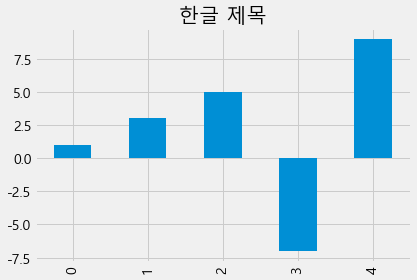

In [17]:
import matplotlib.pyplot as plt

plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)
plt.style.use("fivethirtyeight")

pd.Series([1, 3, 5, -7, 9]).plot.bar(title="한글 제목")

### 시각화 선명하게 설정하기

In [18]:
# retina 디스플레이가 지원되는 환경에서 시각화의 폰트가 좀 더 선명해 보입니다.

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

## 확진일

In [19]:
# 확진일의 빈도수를 봅니다. 어느 날짜에 가장 많이 확진이 되었는지 봅니다.

df["확진일"].value_counts()

8.29.    167
8.27.    160
8.26.    157
8.18.    151
8.15.    146
        ... 
2.2.       1
2.6.       1
4.15.      1
4.19.      1
5.9.       1
Name: 확진일, Length: 218, dtype: int64

In [20]:
# "확진일" 컬럼의 데이터가 날짜 형태가 아니라 문자형태 입니다.

df["확진일"].head(1)

0    9.25.
Name: 확진일, dtype: object

In [21]:
# 데이터 타입을 변경해서 날짜형태로 변환합니다.
# 판다스의 to_datetime 을 사용해서 날짜 타입으로 변경할 수 있습니다.
# 연도가 없기 때문에 2020년을 날짜에 추가하고 "-" 문자로 날짜를 연결해 줍니다.

df["확진일자"] = pd.to_datetime("2020-"+ df["확진일"].str.replace(".", "-"))
df[["확진일", "확진일자"]].head()

,확진일,확진일자
0,9.25.,2020-09-25
1,9.25.,2020-09-25
2,9.25.,2020-09-25
3,9.25.,2020-09-25
4,9.25.,2020-09-25


In [22]:
# 월만 추출합니다.

df["월"] = df["확진일자"].dt.month
df[["확진일", "확진일자", "월"]].tail()

,확진일,확진일자,월
5173,1.31.,2020-01-31,1
5174,1.30.,2020-01-30,1
5175,1.30.,2020-01-30,1
5176,1.30.,2020-01-30,1
5177,1.24.,2020-01-24,1


In [23]:
# 해당 연도의 몇번째 "주"인지 추출합니다.

df["주"] = df["확진일자"].dt.week
df[["확진일", "확진일자", "월", "주"]].head()

,확진일,확진일자,월,주
0,9.25.,2020-09-25,9,39
1,9.25.,2020-09-25,9,39
2,9.25.,2020-09-25,9,39
3,9.25.,2020-09-25,9,39
4,9.25.,2020-09-25,9,39


### 선그래프 그리기
[Visualization — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

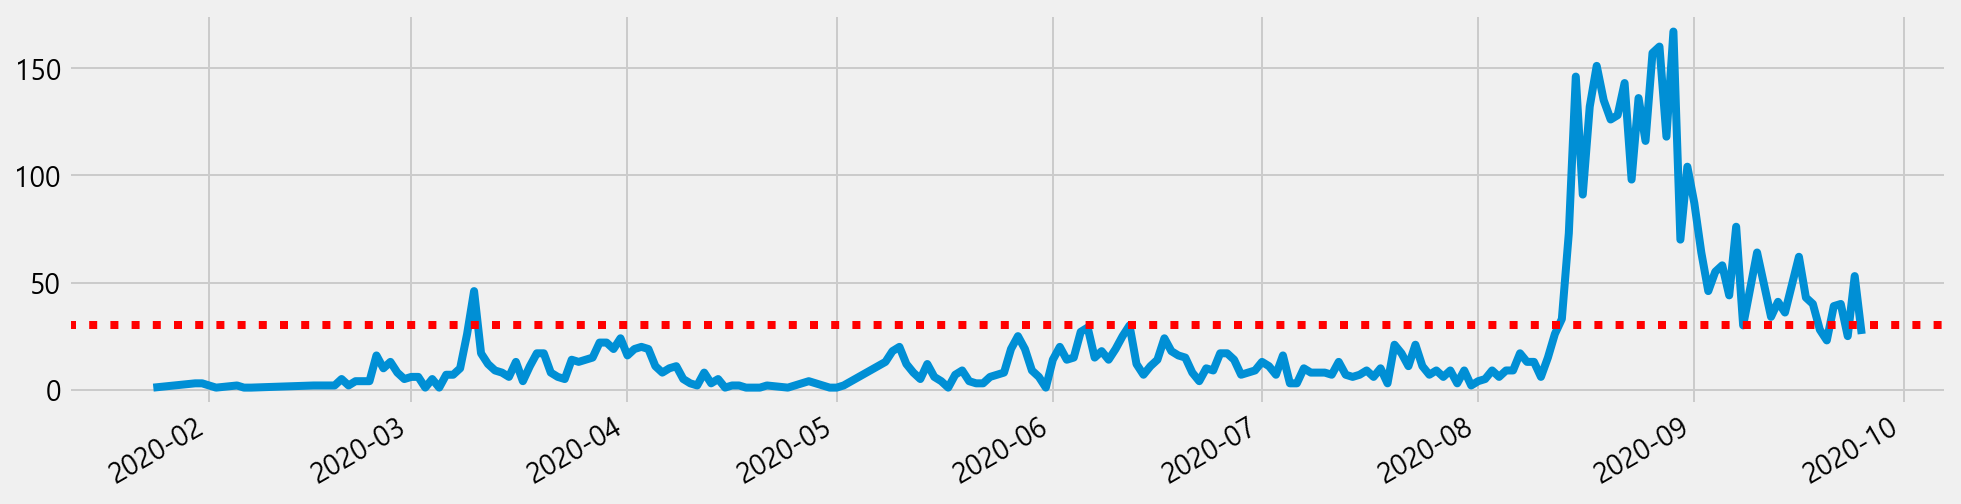

In [24]:
# 확진일자로 선그래프를 그립니다.

df["확진일자"].value_counts().sort_index().plot(figsize=(15, 4))
plt.axhline(30, color="red", linestyle=":")

### 선그래프에 값 표시하기

In [25]:
# 일자별 확진자수를 선그래프로 그립니다.
# 연도는 모두 2020년이기 때문에 월일만 표기되도록 슬라이싱을 사용해 "월일" 컬럼을 만듭니다.
df["월일"] = df["확진일자"].astype(str).map(lambda x : x[-5:])
day_count = df["월일"].value_counts().sort_index()
day_count.iloc[2]

3

In [26]:
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count > 20:
        print(i, case_count)

27 26
28 46
46 22
47 22
49 24
95 25
104 27
105 29
110 25
111 30
116 24
149 21
152 21
172 26
173 33
174 73
175 146
176 91
177 132
178 151
179 135
180 126
181 128
182 143
183 98
184 136
185 116
186 157
187 160
188 118
189 167
190 70
191 104
192 87
193 64
194 46
195 55
196 58
197 44
198 76
199 30
200 47
201 64
202 49
203 34
204 41
205 36
206 49
207 62
208 43
209 40
210 28
211 23
212 39
213 40
214 25
215 53
216 26


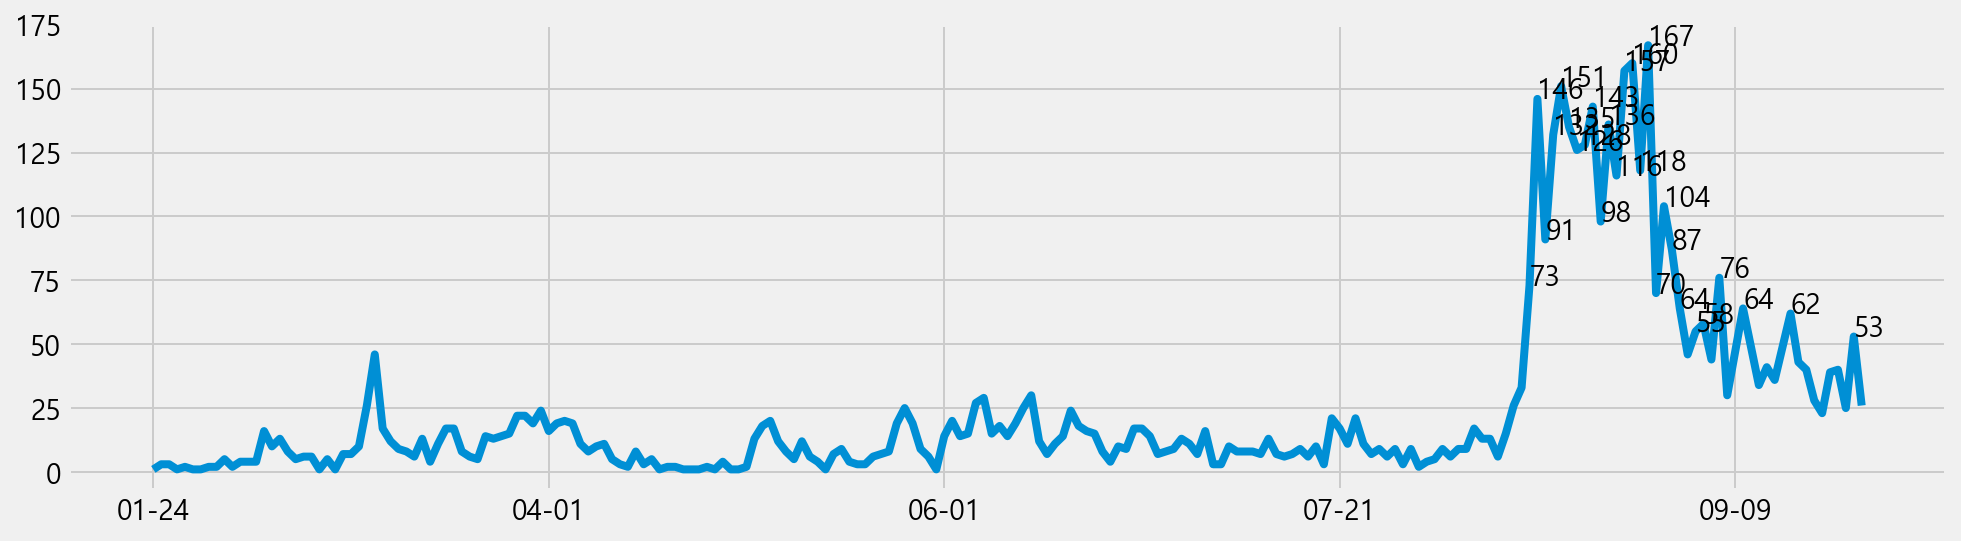

In [27]:
#x는 index값, y는 value값, s는 표시하는 값
g = day_count.plot(figsize=(15, 4))
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count > 50:
        g.text(x=i, y=case_count, s=case_count)

### 확진자가 가장 많이 나온 날

In [28]:
day_count

01-24     1
01-30     3
01-31     3
02-02     1
02-05     2
         ..
09-21    39
09-22    40
09-23    25
09-24    53
09-25    26
Name: 월일, Length: 217, dtype: int64

In [29]:
# describe 를 통해 일자별 확진자수를 describe를 통해 요약해 봅니다.

day_count.describe()

count    217.000000
mean      23.861751
std       34.658242
min        1.000000
25%        6.000000
50%       11.000000
75%       22.000000
max      167.000000
Name: 월일, dtype: float64

In [30]:
# 확진자가 가장 많았던 날을 찾습니다.

day_count[day_count == day_count.max()]

08-29    167
Name: 월일, dtype: int64

In [31]:
# 확진자가 가장 많았던 날의 발생이력을 찾습니다.

df[df["월일"] == "08-29"].head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
1265,3913,20100,8.29.,관악구,-,타시도 확진자 접촉,퇴원,2020-08-29,8,35,08-29
1300,3878,19716,8.29.,동작구,-,성북구 사랑제일교회 관련,퇴원,2020-08-29,8,35,08-29
1327,3851,19830,8.29.,구로구,-,영등포구 권능교회,퇴원,2020-08-29,8,35,08-29
1328,3850,19849,8.29.,노원구,-,노원구 빛가온교회 관련,퇴원,2020-08-29,8,35,08-29
1329,3849,19898,8.29.,금천구,-,타시도 확진자 접촉,퇴원,2020-08-29,8,35,08-29


### 막대그래프 그리기

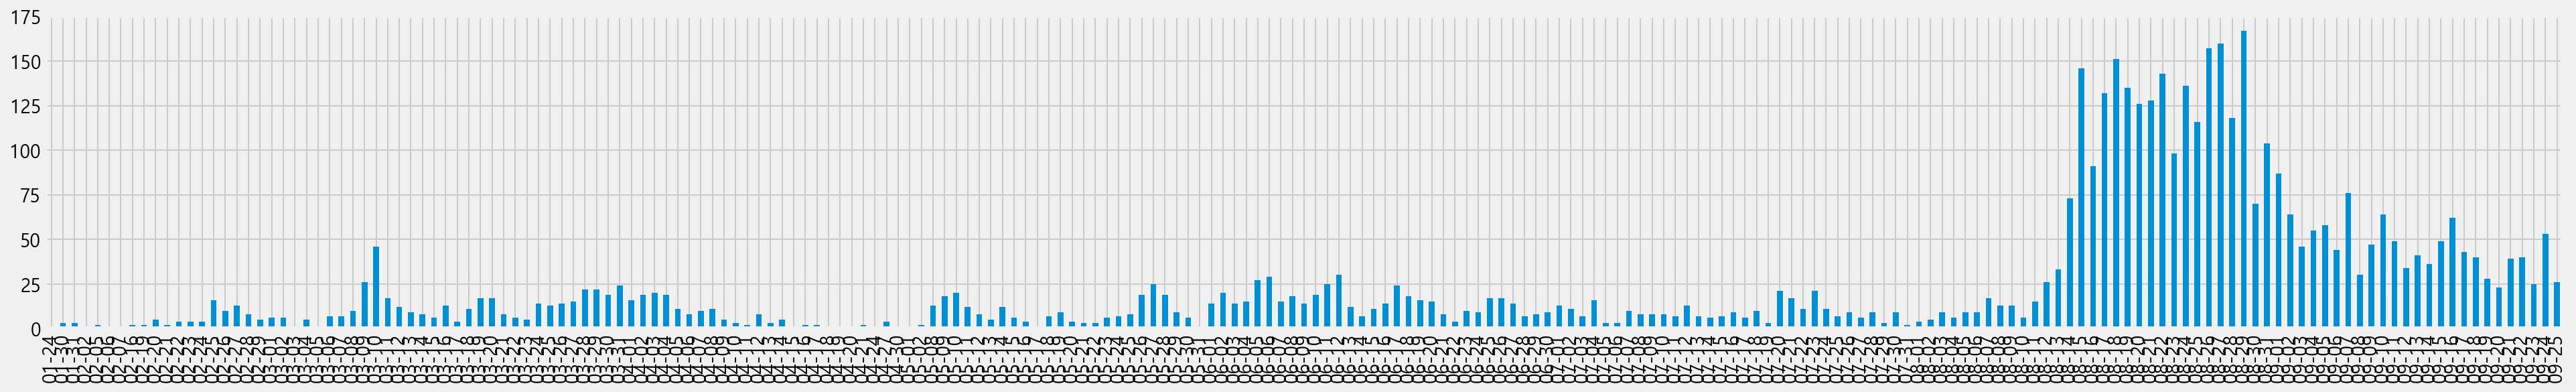

In [32]:
# 선그래프로 그렸던 그래프를 막대그래프로 그립니다.

day_count.plot.bar(figsize=(30, 4))

### 최근 데이터만 슬라이싱으로 나눠 그리기

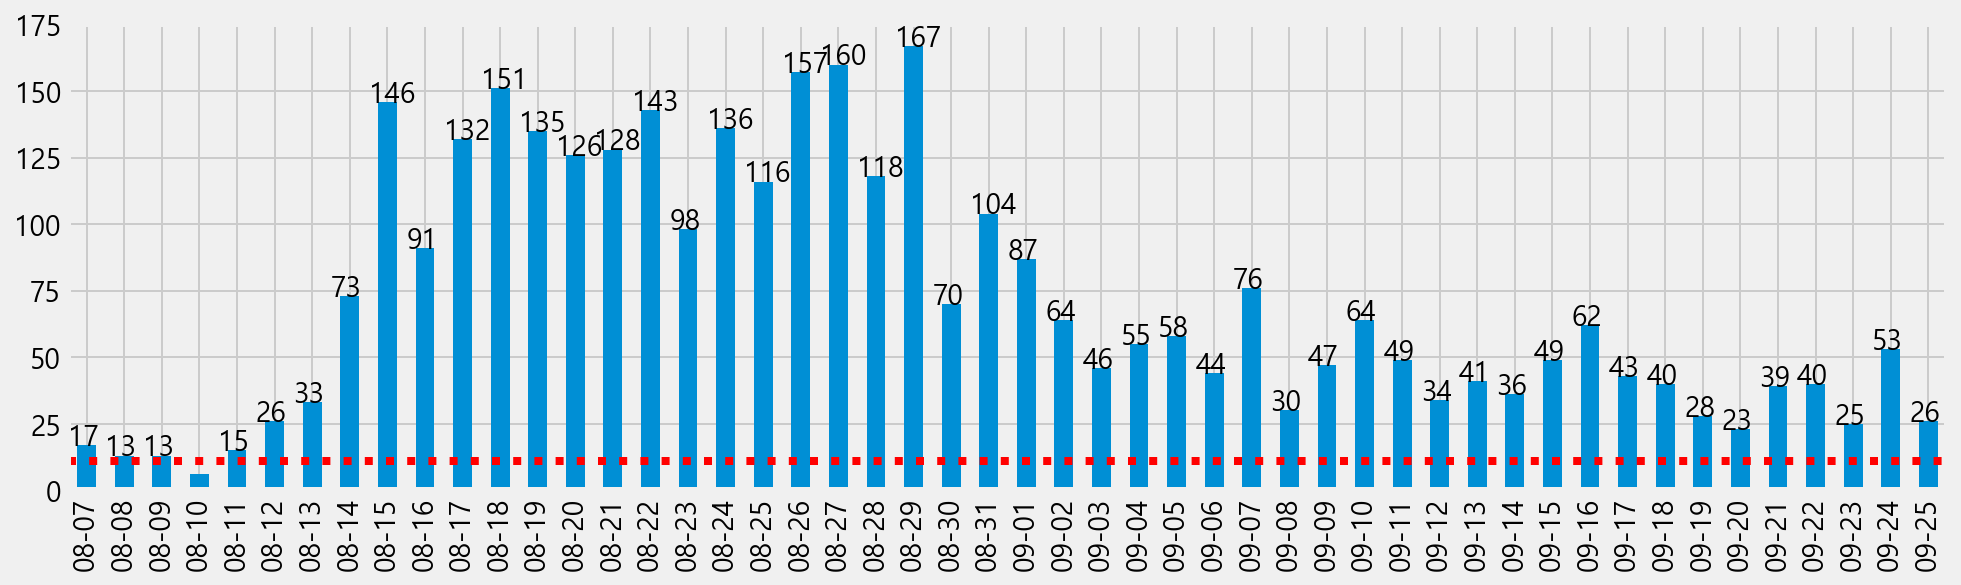

In [33]:
# 슬라이싱을 통해 최근 데이터만 그립니다.

g = day_count[-50:].plot.bar(figsize=(15, 4))
g.axhline(day_count.median(), linestyle=":", color="red")

for i in range(50):
    case_count = day_count[-50:].iloc[i]
    if case_count > 10:
        g.text(x=i-0.5, y=case_count, s=case_count)

### 월별 확진자 수 그리기

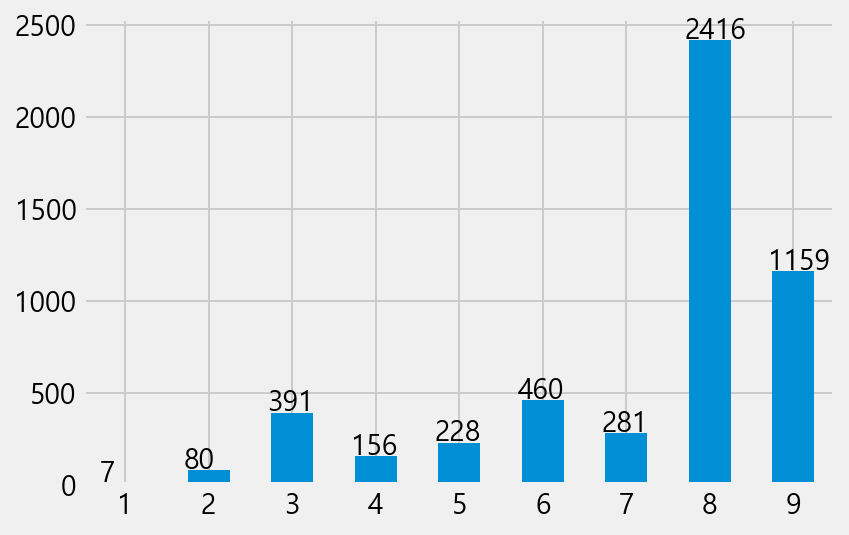

In [34]:
# 월별 확진자수에 대한 빈도수를 구해서 시각화 합니다.
#y에 10을 더하는 이유는 확진자수를 더 높은데에서 출력하기 위함
month_case = df["월"].value_counts().sort_index()
g = month_case.plot.bar(rot=0)

for i in range(len(month_case)):
    g.text(x=i-0.3 ,y=month_case.iloc[i]+10, s=month_case.iloc[i])

### 주단위 확진자수 그리기

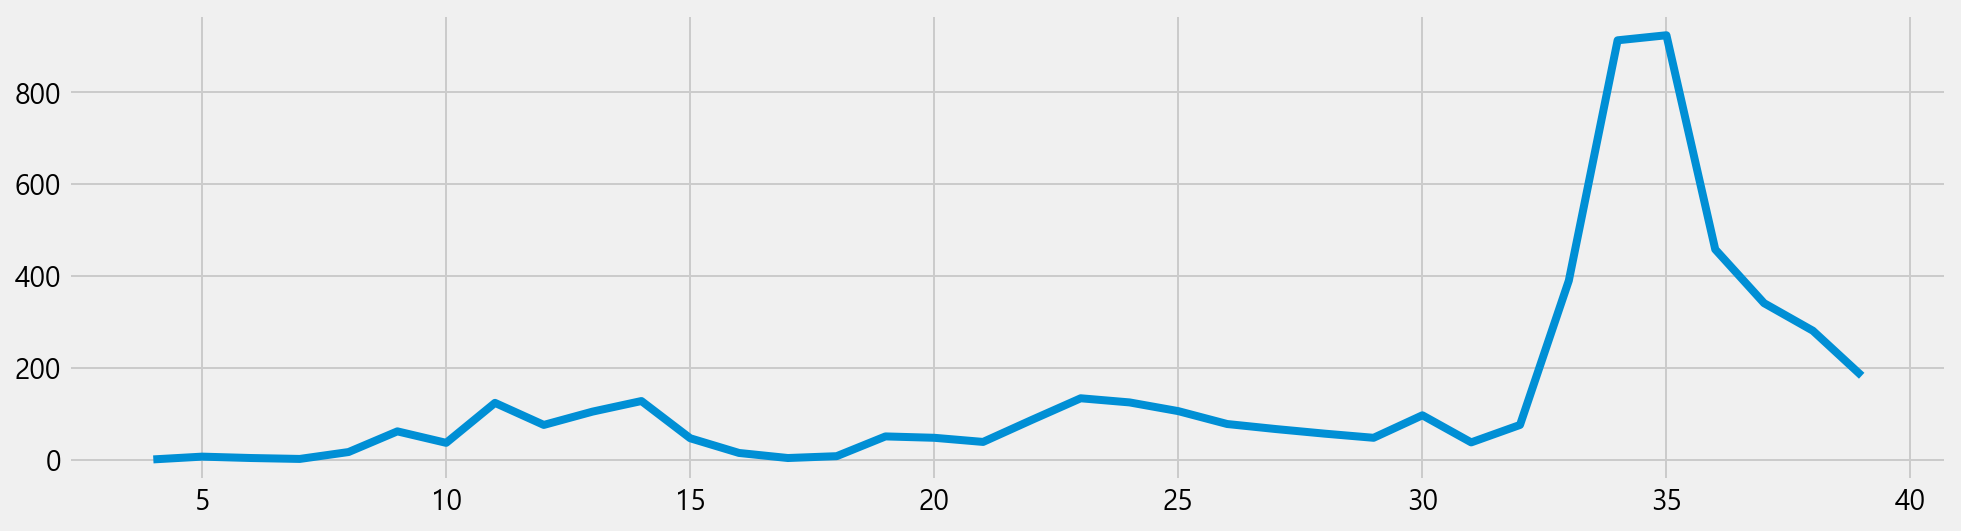

In [35]:
# 주별로 빈도수를 구합니다.

weekly_case = df["주"].value_counts().sort_index()
weekly_case.plot(figsize=(15, 4))

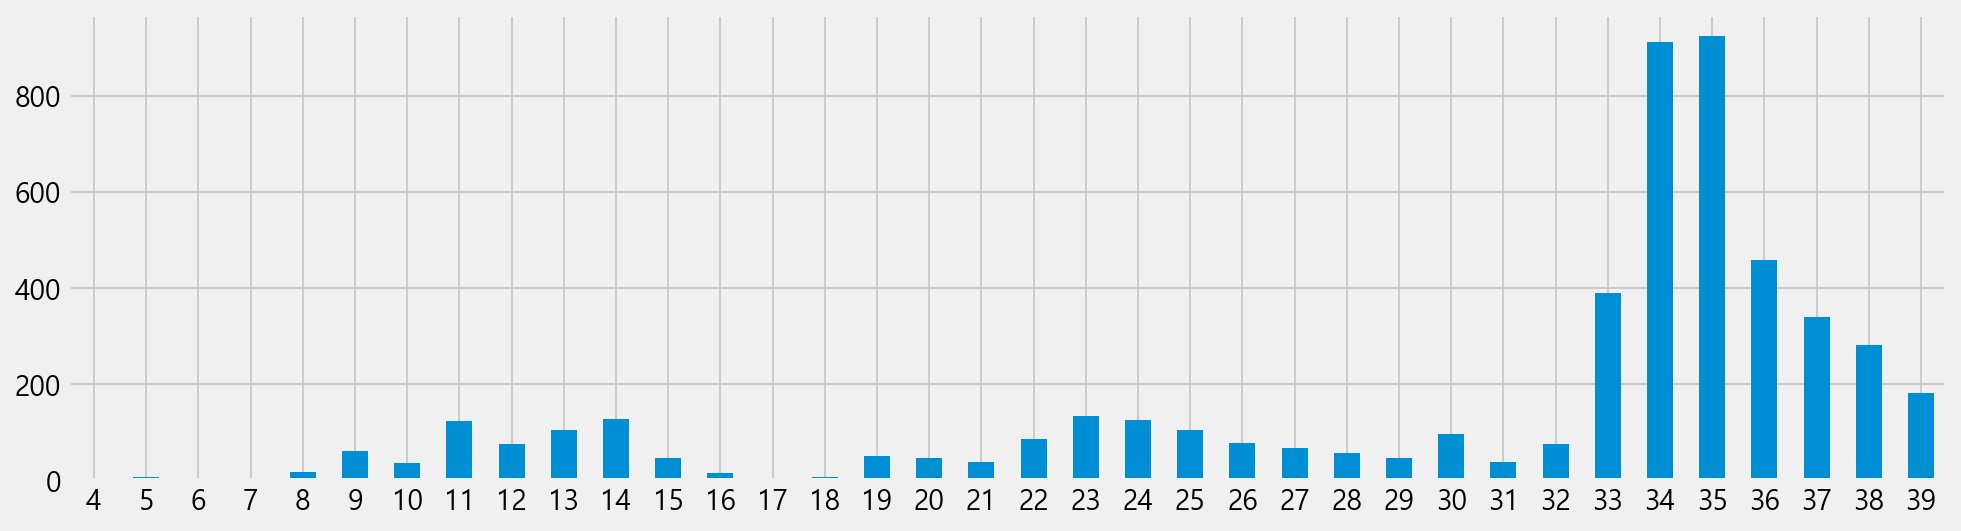

In [36]:
# 주단위 빈도수 막대그래프로 그리기
weekly_case.plot.bar(figsize=(15, 4), rot=0)

### 월-주 함께 그리기

In [37]:
# groupby 를 통해 "월", "주" 로 그룹화 하여 빈도수를 계산합니다.

month_weekly_case = df.groupby(["월", "주"])["연번"].count()
month_weekly_case

월  주 
1  4       1
   5       6
2  5       1
   6       4
   7       2
   8      17
   9      56
3  9       6
   10     37
   11    124
   12     76
   13    105
   14     43
4  14     85
   15     47
   16     15
   17      4
   18      5
5  18      3
   19     51
   20     48
   21     39
   22     87
6  23    134
   24    125
   25    106
   26     78
   27     17
7  27     50
   28     57
   29     48
   30     97
   31     29
8  31      9
   32     76
   33    390
   34    913
   35    924
   36    104
9  36    354
   37    341
   38    281
   39    183
Name: 연번, dtype: int64

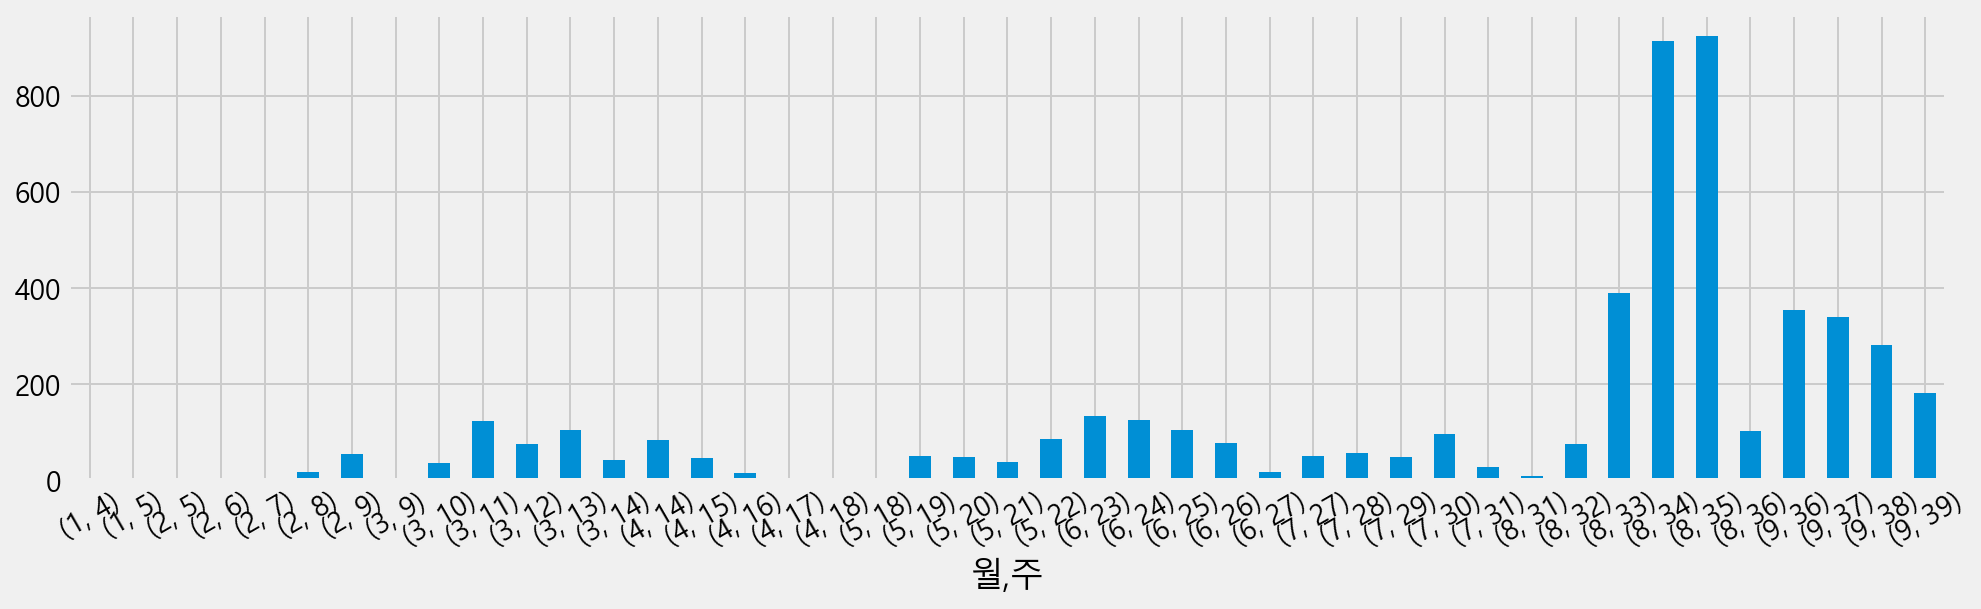

In [38]:
# 월-주 를 함께 그래프에 표현하기

month_weekly_case.plot.bar(figsize=(15, 4), rot=30)

## 모든 날짜를 행에 만들어 주기
* 확진자가 없는 날의 데이터도 만들어 줍니다.

In [39]:
# 첫 확진일 부터 마지막 확진일까지 가져옵니다.
# 데이터프레임의 첫번째 날짜는 first_day 에 마지막 날짜는 last_day 에 담습니다.
#time it은 수행하는데 걸리는 시간을 측정하는 것임
first_day = df.iloc[-1, 7]

In [40]:
last_day = df.iloc[0, 7]

In [41]:
# pd.date_range 를 통해 시작하는 날짜부터 끝나는 날짜까지의 
# DatetimeIndex 를 만들고 days 라는 변수에 저장합니다.

days = pd.date_range(first_day, last_day)
days[-5:]

DatetimeIndex(['2020-09-21', '2020-09-22', '2020-09-23', '2020-09-24',
               '2020-09-25'],
              dtype='datetime64[ns]', freq='D')

In [42]:
# days 변수의 값으로 "연월일" 이라는 컬럼이름을 갖는 데이터프레임을 만듭니다.
#series 형태라 day_count와 merge를 못하기 때문에 dataframe형태로 바꿔준다.
# days.to_frame()

df_days =  pd.DataFrame({"확진일자": days})
df_days.head()

,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28


In [43]:
# 확진일자별로 빈도수 구하기
daily_case = df["확진일자"].value_counts()
daily_case.head()

2020-08-29    167
2020-08-27    160
2020-08-26    157
2020-08-18    151
2020-08-15    146
Name: 확진일자, dtype: int64

In [44]:
# 확진일자별로 빈도수 구한 내용을 데이터프레임으로 변환하기

df_daily_case = daily_case.to_frame()
df_daily_case.head()

,확진일자
2020-08-29,167
2020-08-27,160
2020-08-26,157
2020-08-18,151
2020-08-15,146


In [45]:
# value_counts 결과의 컬럼명을 "확진수" 로 바꾸기

df_daily_case.columns = ["확진수"]
df_daily_case.head()

,확진수
2020-08-29,167
2020-08-27,160
2020-08-26,157
2020-08-18,151
2020-08-15,146


### merge 를 통해 전체 확진일자 만들기
* 이미지 출처 및 Pandas 공식문서 보기 : [How to combine data from multiple tables? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/08_combine_dataframes.html#join-tables-using-a-common-identifier)

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/08_merge_left.svg">

In [46]:
# 확진자가 없는 날도 일자에 표현이 되도록 전체 일자와 확진 데이터를 merge 로 합쳐줍니다.
# 1321
#확진일자를 기준으로 merge하고 
all_day = df_days.merge(df_daily_case, 
                        left_on="확진일자", 
                        right_on=df_daily_case.index, how="left")
all_day.head()

,확진일자,확진수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN


## 누적 확진자 수 구하기

In [47]:
# 확진수를 fillna를 통해 결측치를 0으로 채워주고 누적해서 더해줍니다.

all_day["누적확진"] = all_day["확진수"].fillna(0).cumsum()
all_day

,확진일자,확진수,누적확진
0,2020-01-24,1.0,1.0
1,2020-01-25,NaN,1.0
2,2020-01-26,NaN,1.0
3,2020-01-27,NaN,1.0
4,2020-01-28,NaN,1.0
...,...,...,...
241,2020-09-21,39.0,5034.0
242,2020-09-22,40.0,5074.0
243,2020-09-23,25.0,5099.0
244,2020-09-24,53.0,5152.0


In [48]:
# 연도를 제외하고 월-일로 "일자" 컬럼 만들기

all_day["일자"] = all_day["확진일자"].astype(str).map(lambda x : x[-5:])
all_day.head()

,확진일자,확진수,누적확진,일자
0,2020-01-24,1.0,1.0,01-24
1,2020-01-25,NaN,1.0,01-25
2,2020-01-26,NaN,1.0,01-26
3,2020-01-27,NaN,1.0,01-27
4,2020-01-28,NaN,1.0,01-28


In [49]:
# "확진수", "누적확진" 컬럼을 갖는 데이터프레임을 만듭니다.
cum_day = all_day[["일자", "확진수", "누적확진"]]
cum_day = cum_day.set_index("일자")
cum_day.head()

,확진수,누적확진
일자,,
01-24,1.0,1.0
01-25,NaN,1.0
01-26,NaN,1.0
01-27,NaN,1.0
01-28,NaN,1.0


### 데이터프레임으로 그리기

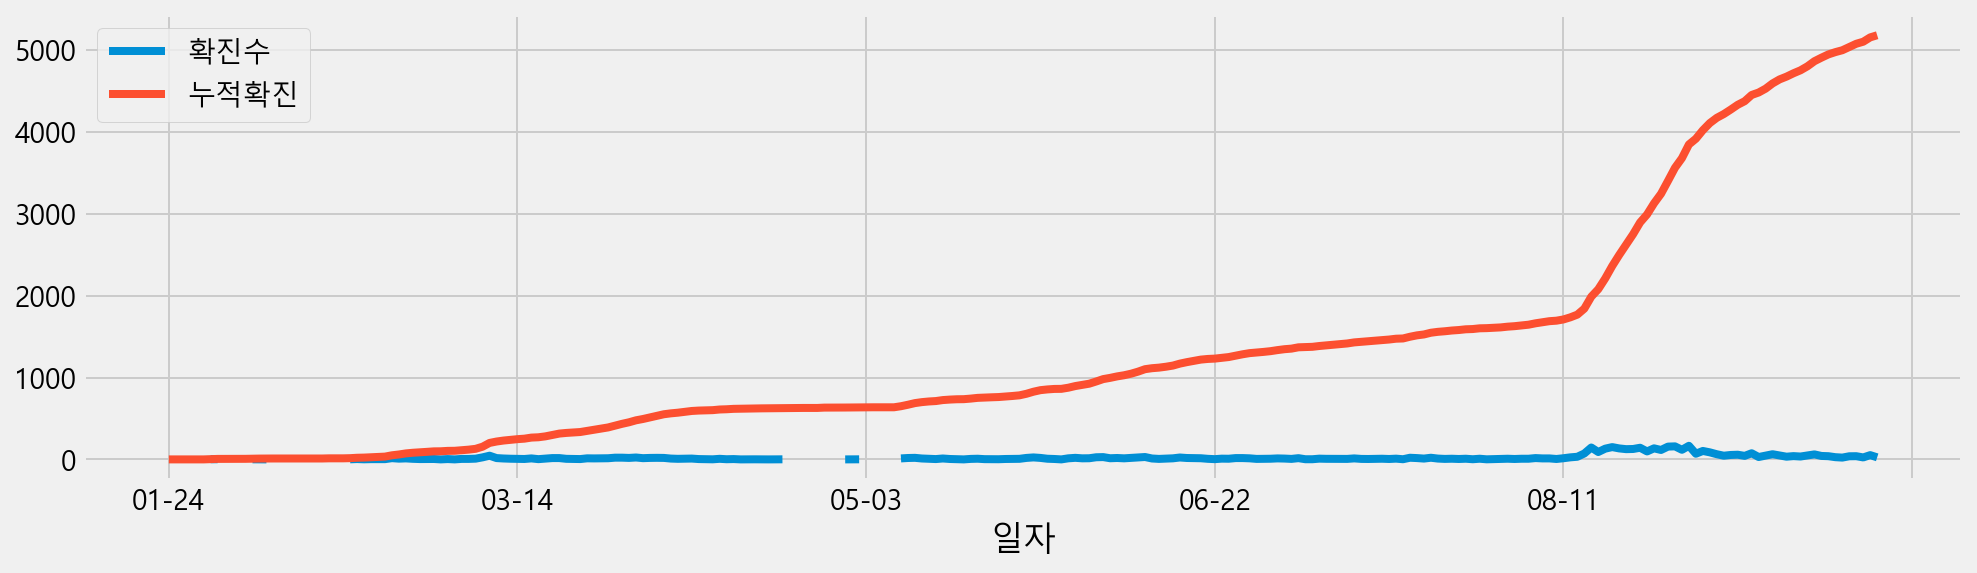

In [50]:
# 데이터프레임으로 확진수와 누적확진을 선그래프로 그립니다.

cum_day.plot(figsize=(15, 4))

### 시리즈로 그리기

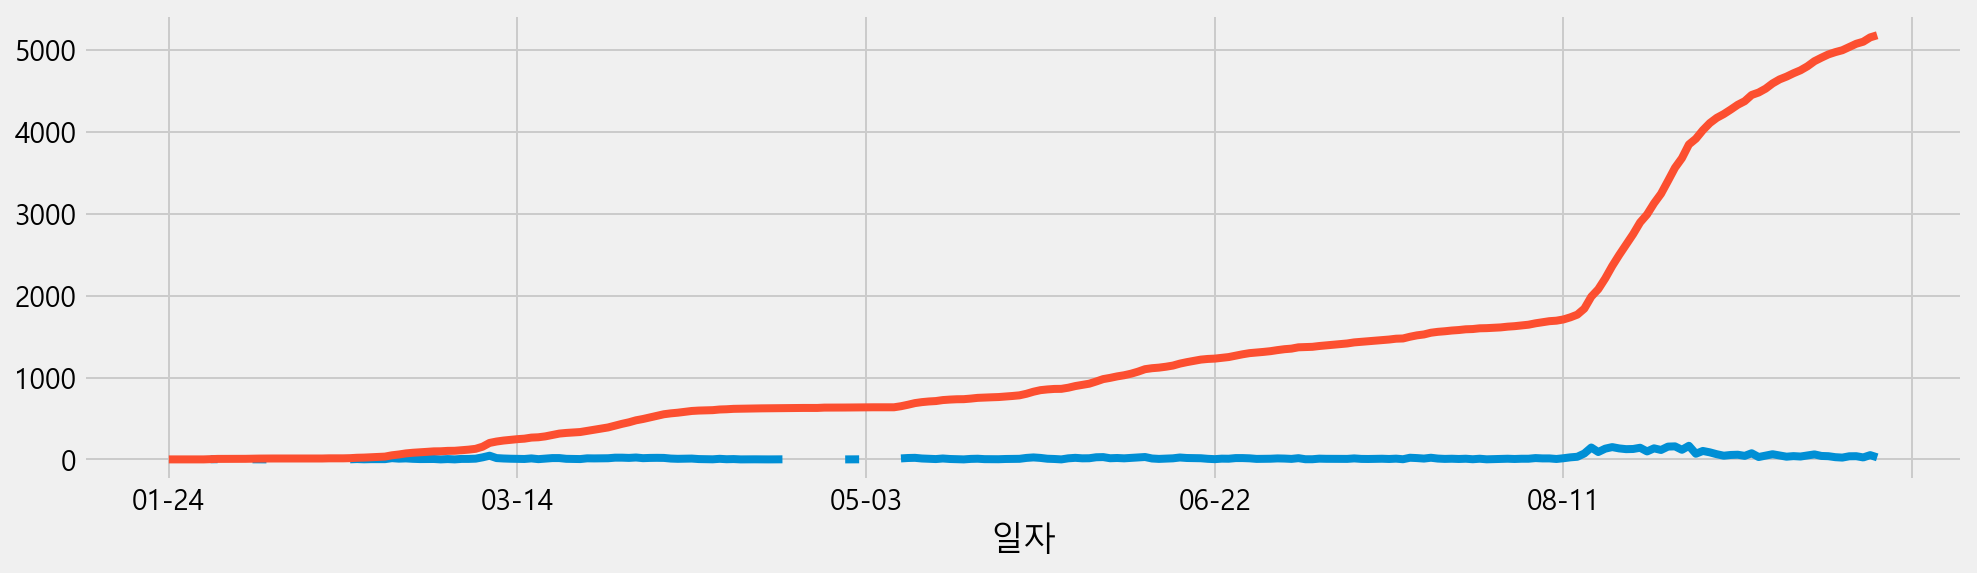

In [51]:
# 시리즈로 2개의 그래프 그리기

cum_day["확진수"].plot()
cum_day["누적확진"].plot(figsize=(15, 4))

### 확진수만 따로 그리기

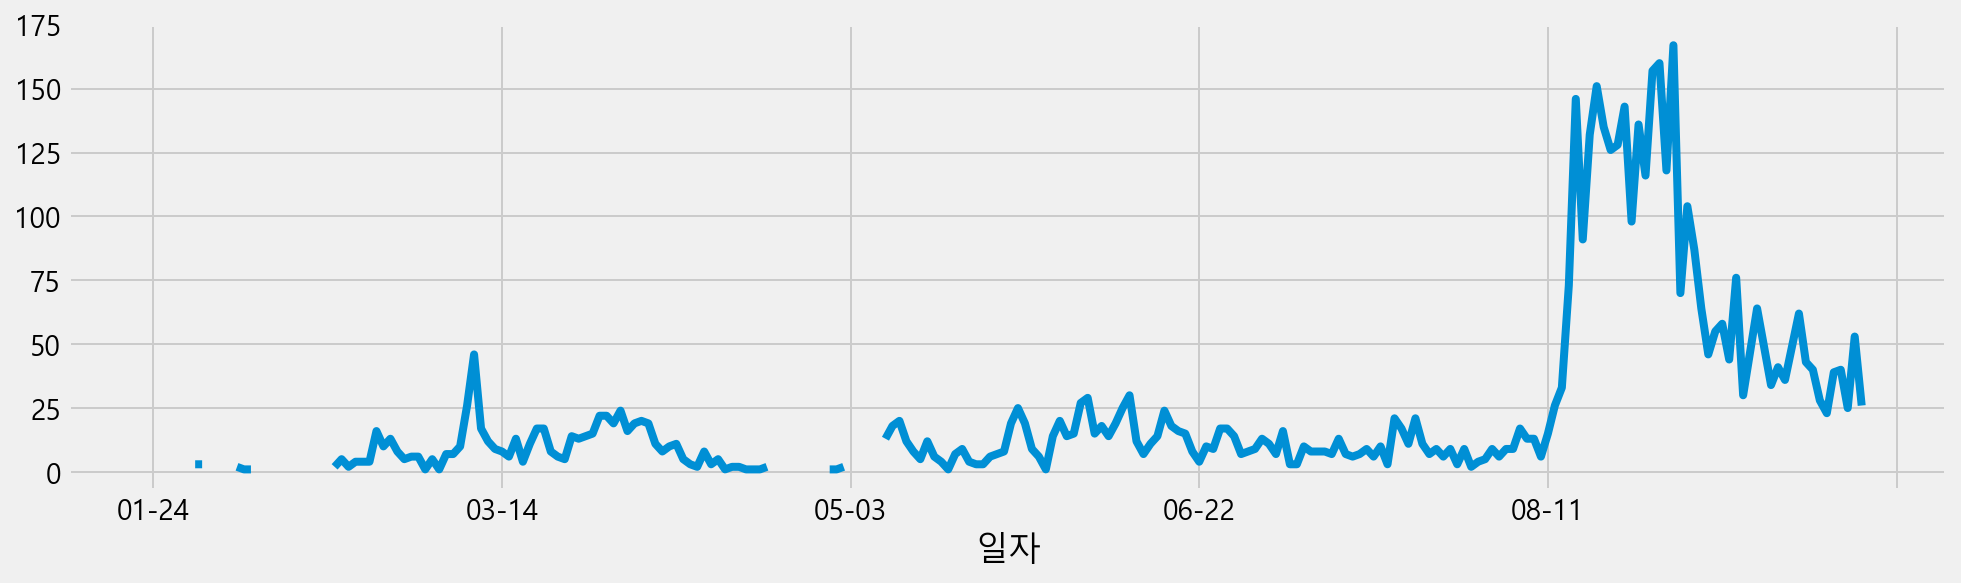

In [52]:
# 누적확진수와 확진수와 차이가 크면 제대로 보이지 않기 때문에 확진수만 그립니다.
cum_day["확진수"].plot(figsize=(15, 4))

### 누적확진만 따로 그리기

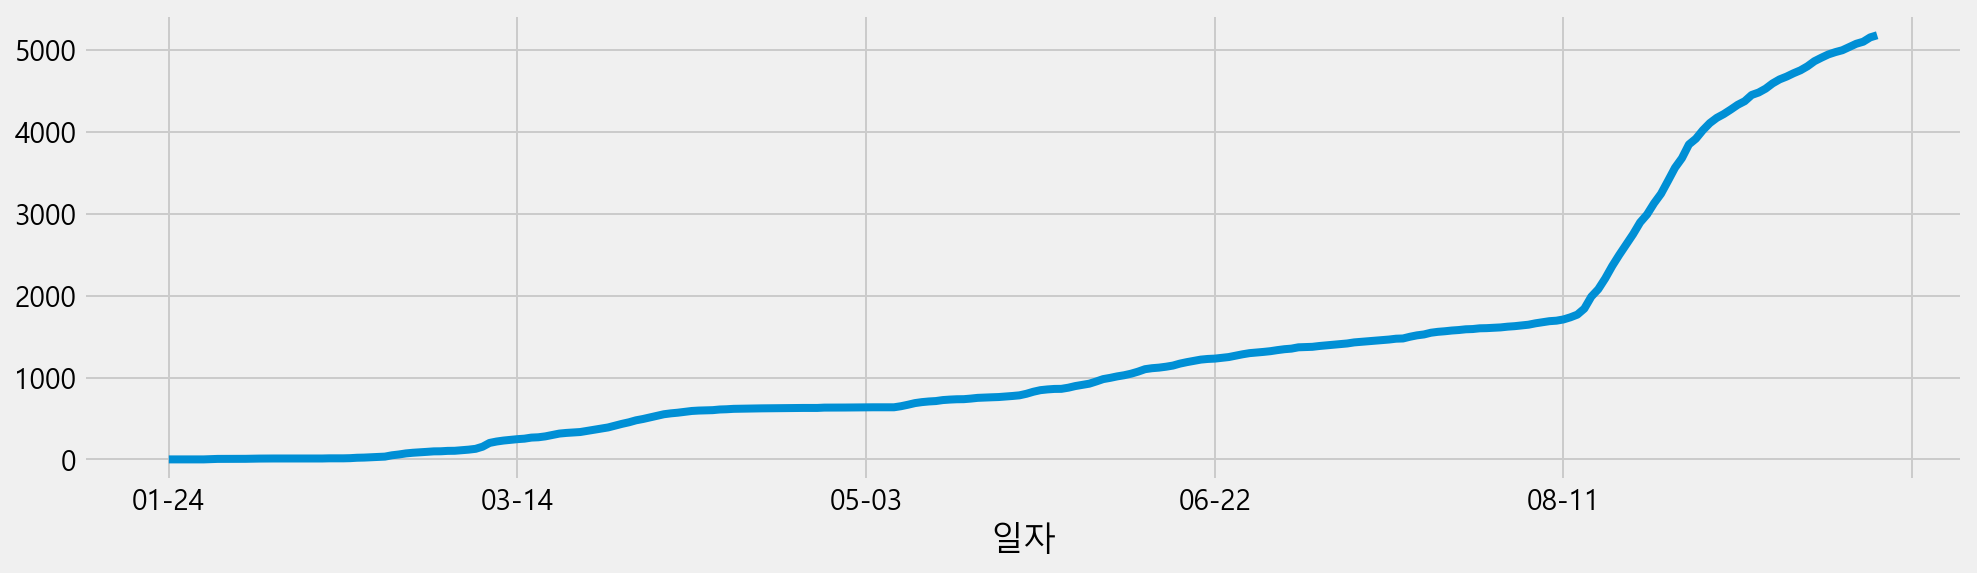

In [53]:
# 누적확진만 따로 그립니다.

cum_day["누적확진"].plot(figsize=(15, 4))

### 로그스케일
* 차이가 너무 커서 그래프가 자세히 보이지 않을때 로그스케일로 표현하면 차이가 큰 값의 스케일을 조정해주게 됩니다.

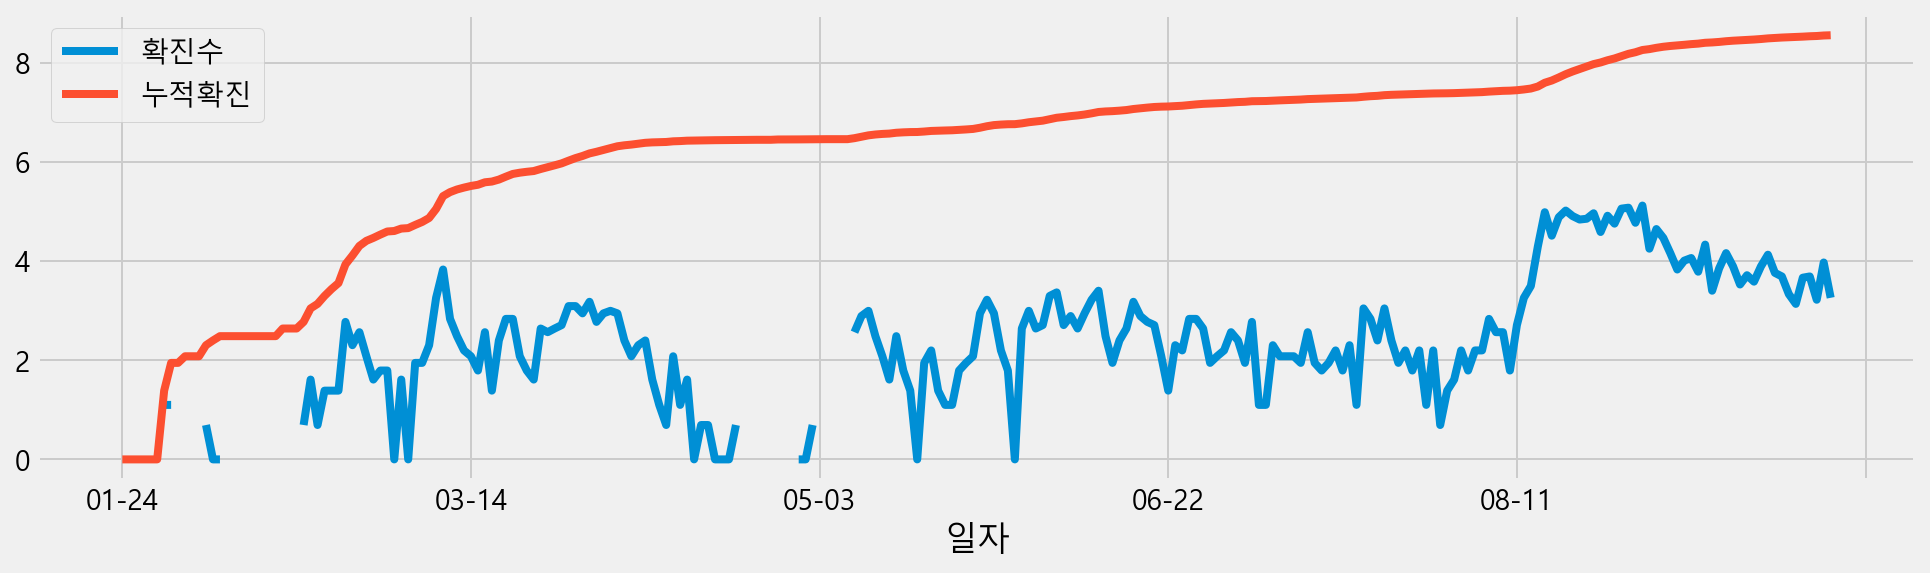

In [54]:
#차이가 너무 많이 나는 데이터들을 같이 비교할 경우 log처리를 해서 차이를 적게 만든다
np.log(cum_day).plot(figsize=(15,4))

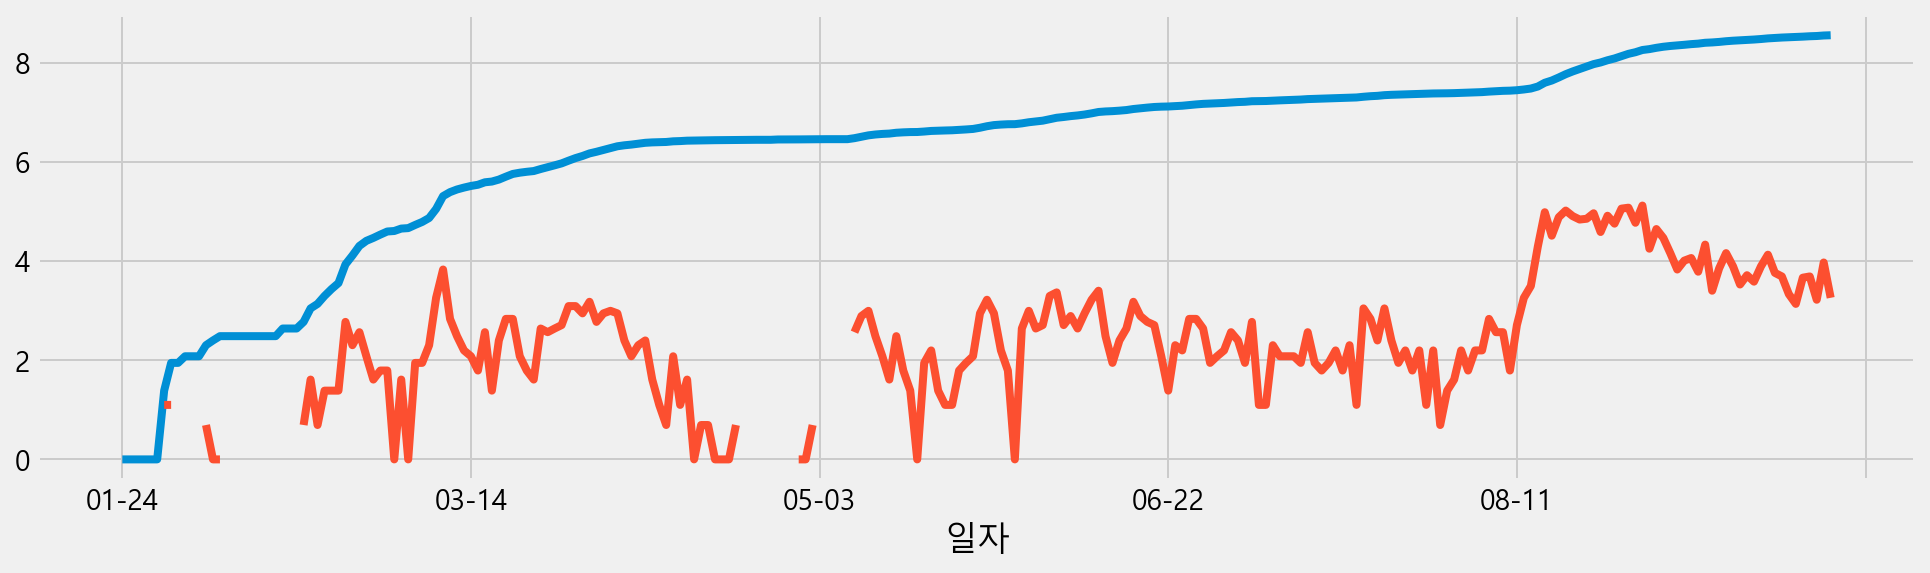

In [55]:
np.log(cum_day["누적확진"]).plot(figsize=(15, 4))
np.log(cum_day["확진수"]).plot()

## 확진월과 요일 구하기

In [56]:
# cum_day
#dayofweek=요일을 나타냄
all_day["확진월"] = all_day["확진일자"].dt.month
all_day["확진요일"] = all_day["확진일자"].dt.dayofweek
all_day.head()

,확진일자,확진수,누적확진,일자,확진월,확진요일
0,2020-01-24,1.0,1.0,01-24,1,4
1,2020-01-25,NaN,1.0,01-25,1,5
2,2020-01-26,NaN,1.0,01-26,1,6
3,2020-01-27,NaN,1.0,01-27,1,0
4,2020-01-28,NaN,1.0,01-28,1,1


### 요일별 확진 수 

In [57]:
# 월별, 요일별 확진수를 groupby로 구하기

all_day_week = all_day.groupby(["확진월", "확진요일"])["확진수"].sum()
all_day_week = all_day_week.unstack().astype(int)
all_day_week

확진요일,0,1,2,3,4,5,6
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,288,327,328,336,473,277
9,151,206,198,206,170,120,108


In [58]:
# 숫자로 표현된 요일을 문자로 바꿔주기 위해 split 을 통해 문자를 리스트로 변경합니다.
dayofweek = "월 화 수 목 금 토 일"
dayofweek = dayofweek.split()
dayofweek

['월', '화', '수', '목', '금', '토', '일']

In [59]:
# 컬럼의 이름을 한글요일명으로 변경해 줍니다.

all_day_week.columns = dayofweek
all_day_week

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,288,327,328,336,473,277
9,151,206,198,206,170,120,108


In [60]:
# style.background_gradient 로 색상을 표현합니다.

all_day_week.style.background_gradient(cmap="Blues")

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,288,327,328,336,473,277
9,151,206,198,206,170,120,108


## 거주지별 확진자

In [61]:
# 거주지(구별) 확진자의 빈도수를 구하고 시각화 합니다.

gu_count = df["거주지"].value_counts()
gu_count.head()

관악구    372
송파구    334
성북구    328
노원구    301
강서구    281
Name: 거주지, dtype: int64

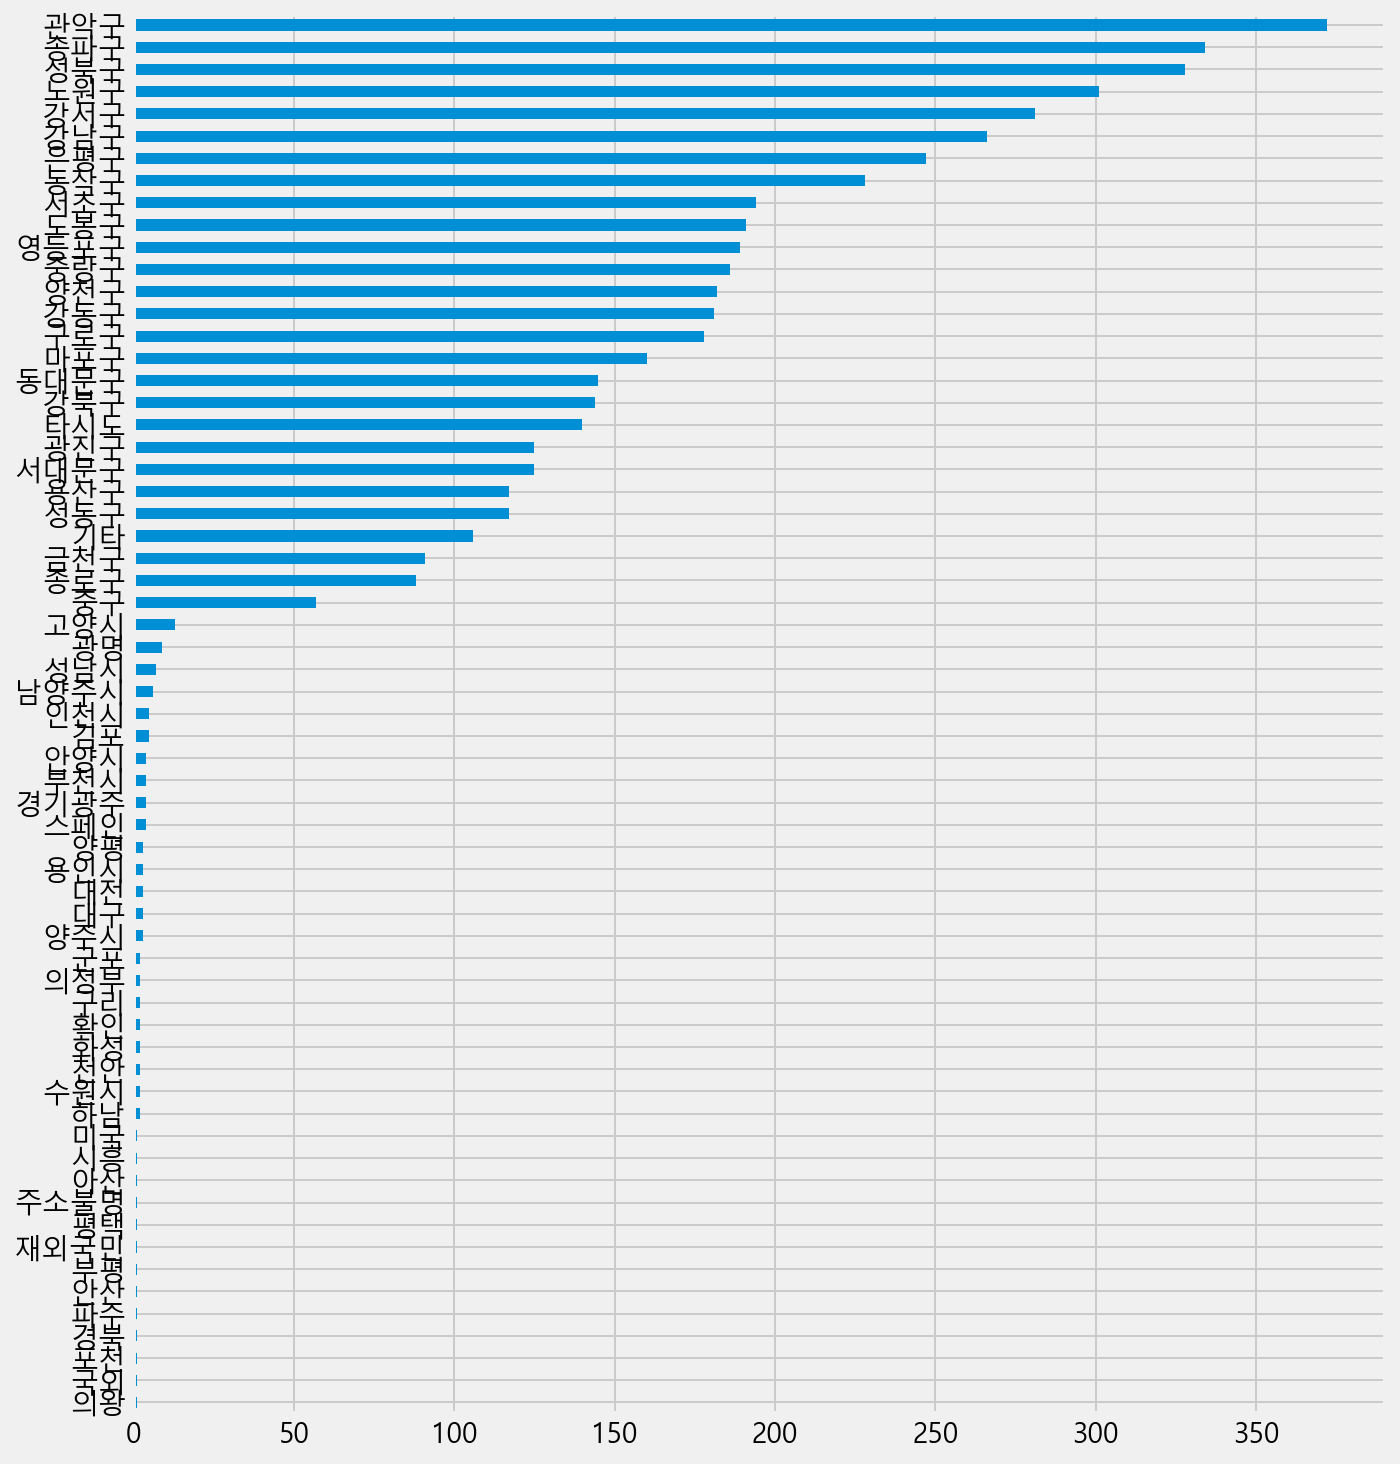

In [62]:
# 구별 확진자의 수를 시각화 합니다.

gu_count.sort_values().plot.barh(figsize=(10, 12))

In [63]:
# 서울에서 확진판정을 받은 데이터이기 때문에 거주지가 서울이 아닐 수도 있습니다.
# 거주지 별로 서울시에 해당되는 데이터만 따로 가져옵니다.

gu = gu_count[:27].index
gu


Index(['관악구', '송파구', '성북구', '노원구', '강서구', '강남구', '은평구', '동작구', '서초구', '도봉구',
       '영등포구', '중랑구', '양천구', '강동구', '구로구', '마포구', '동대문구', '강북구', '타시도', '광진구',
       '서대문구', '용산구', '성동구', '기타', '금천구', '종로구', '중구'],
      dtype='object')

In [64]:
gu

Index(['관악구', '송파구', '성북구', '노원구', '강서구', '강남구', '은평구', '동작구', '서초구', '도봉구',
       '영등포구', '중랑구', '양천구', '강동구', '구로구', '마포구', '동대문구', '강북구', '타시도', '광진구',
       '서대문구', '용산구', '성동구', '기타', '금천구', '종로구', '중구'],
      dtype='object')

In [65]:
#시점이 달라서 서울이 아닌 시의 데이터도 포함되어 있기에 list형태로 바꿔서 제거해준다.
gu_index=gu.to_list()
gu_index.remove('기타')
gu_index.remove('타시도')
gu_index

['관악구',
 '송파구',
 '성북구',
 '노원구',
 '강서구',
 '강남구',
 '은평구',
 '동작구',
 '서초구',
 '도봉구',
 '영등포구',
 '중랑구',
 '양천구',
 '강동구',
 '구로구',
 '마포구',
 '동대문구',
 '강북구',
 '광진구',
 '서대문구',
 '용산구',
 '성동구',
 '금천구',
 '종로구',
 '중구']

In [66]:
# 거주지가 서울이 아닌 지역을 따로 추출합니다.

set(gu_count.index) - set(gu_index)

{'경기광주',
 '경북',
 '고양시',
 '광명',
 '구리',
 '국외',
 '군포',
 '기타',
 '김포',
 '남양주시',
 '대구',
 '대전',
 '미국',
 '부천시',
 '부평',
 '성남시',
 '수원시',
 '스페인',
 '시흥',
 '아산',
 '안산',
 '안양시',
 '양주시',
 '양평',
 '용인시',
 '의왕',
 '의정부',
 '인천시',
 '재외국민',
 '주소불명',
 '천안',
 '타시도',
 '파주',
 '평택',
 '포천',
 '하남',
 '화성',
 '확인'}

In [67]:
# 구를 전처리 하기 쉽게 컬럼으로 변환하기 위해 reset_index 로 변환합니다.

df_gu = gu_count.reset_index()
df_gu.columns = ["구", "확진수"]
df_gu.head()

,구,확진수
0,관악구,372
1,송파구,334
2,성북구,328
3,노원구,301
4,강서구,281


In [68]:
df_gu[df_gu['구'].isin(gu_index)]

,구,확진수
0,관악구,372
1,송파구,334
2,성북구,328
3,노원구,301
4,강서구,281
5,강남구,266
6,은평구,247
7,동작구,228
8,서초구,194
9,도봉구,191


In [69]:
# df_gu[~df_gu["구"].isin(gu)]
#서울이 아닌 구만 가져오는 코드

In [70]:
# 서울에서 확진 받은 사람 중 서울 vs 타지역을 비교해 보기 위해
# "지역"이라는 새로운 컬럼을 만들어 서울지역이 아니라면 "타지역" 이라는 값을 넣어줍니다. 
# .loc[행인덱스]
# .loc[행, 열]
# .loc[조건, 열]
df.loc[df["거주지"].isin(gu_index), "지역"] = df["거주지"]
# df.loc[~df["거주지"].isin(gu)]
# df.loc[df["지역"].isnull(), "지역"] = "타지역"
df["지역"] = df["지역"].fillna("타지역")
df["지역"].unique()

array(['타지역', '강서구', '영등포구', '서초구', '은평구', '강남구', '관악구', '종로구', '송파구',
       '성북구', '중구', '구로구', '동대문구', '동작구', '도봉구', '강동구', '노원구', '금천구',
       '양천구', '용산구', '중랑구', '광진구', '강북구', '성동구', '마포구', '서대문구'],
      dtype=object)

In [71]:
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
0,5178,23516,9.25.,타시도,-,중랑구 서울의료원,NaN,2020-09-25,9,39,09-25,타지역
1,5177,23506,9.25.,강서구,-,확인 중,NaN,2020-09-25,9,39,09-25,강서구
2,5176,23503,9.25.,영등포구,-,종로구 서울대병원,NaN,2020-09-25,9,39,09-25,영등포구
3,5175,23501,9.25.,서초구,-,해외 접촉 추정,NaN,2020-09-25,9,39,09-25,서초구
4,5174,23499,9.25.,은평구,-,강남구 디와이디벨로먼트,NaN,2020-09-25,9,39,09-25,은평구
...,...,...,...,...,...,...,...,...,...,...,...,...
5173,5,9,1.31.,성북구,-,#5 접촉,퇴원,2020-01-31,1,5,01-31,성북구
5174,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30,마포구
5175,3,6,1.30.,종로구,-,#3 접촉,퇴원,2020-01-30,1,5,01-30,종로구
5176,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30,중랑구


In [72]:
# 위의 방법으로 할수도 있고 아래의 방법으로 만들수도 있습니다.
# 함수 혹은 익명함수를 사용하는 방법으로 "타지역" 값을 만들 수도 있습니다.
df["지역"] = df["거주지"].map(lambda x : x if x in gu else "타지역")
df[["거주지", "지역"]].head()

,거주지,지역
0,타시도,타시도
1,강서구,강서구
2,영등포구,영등포구
3,서초구,서초구
4,은평구,은평구


In [73]:
# "지역" 컬럼으로 확진자 빈도수를 구합니다.
gu_etc_count = df["지역"].value_counts()
gu_etc_count

관악구     372
송파구     334
성북구     328
노원구     301
강서구     281
강남구     266
은평구     247
동작구     228
서초구     194
도봉구     191
영등포구    189
중랑구     186
양천구     182
강동구     181
구로구     178
마포구     160
동대문구    145
강북구     144
타시도     140
광진구     125
서대문구    125
성동구     117
용산구     117
기타      106
타지역     105
금천구      91
종로구      88
중구       57
Name: 지역, dtype: int64

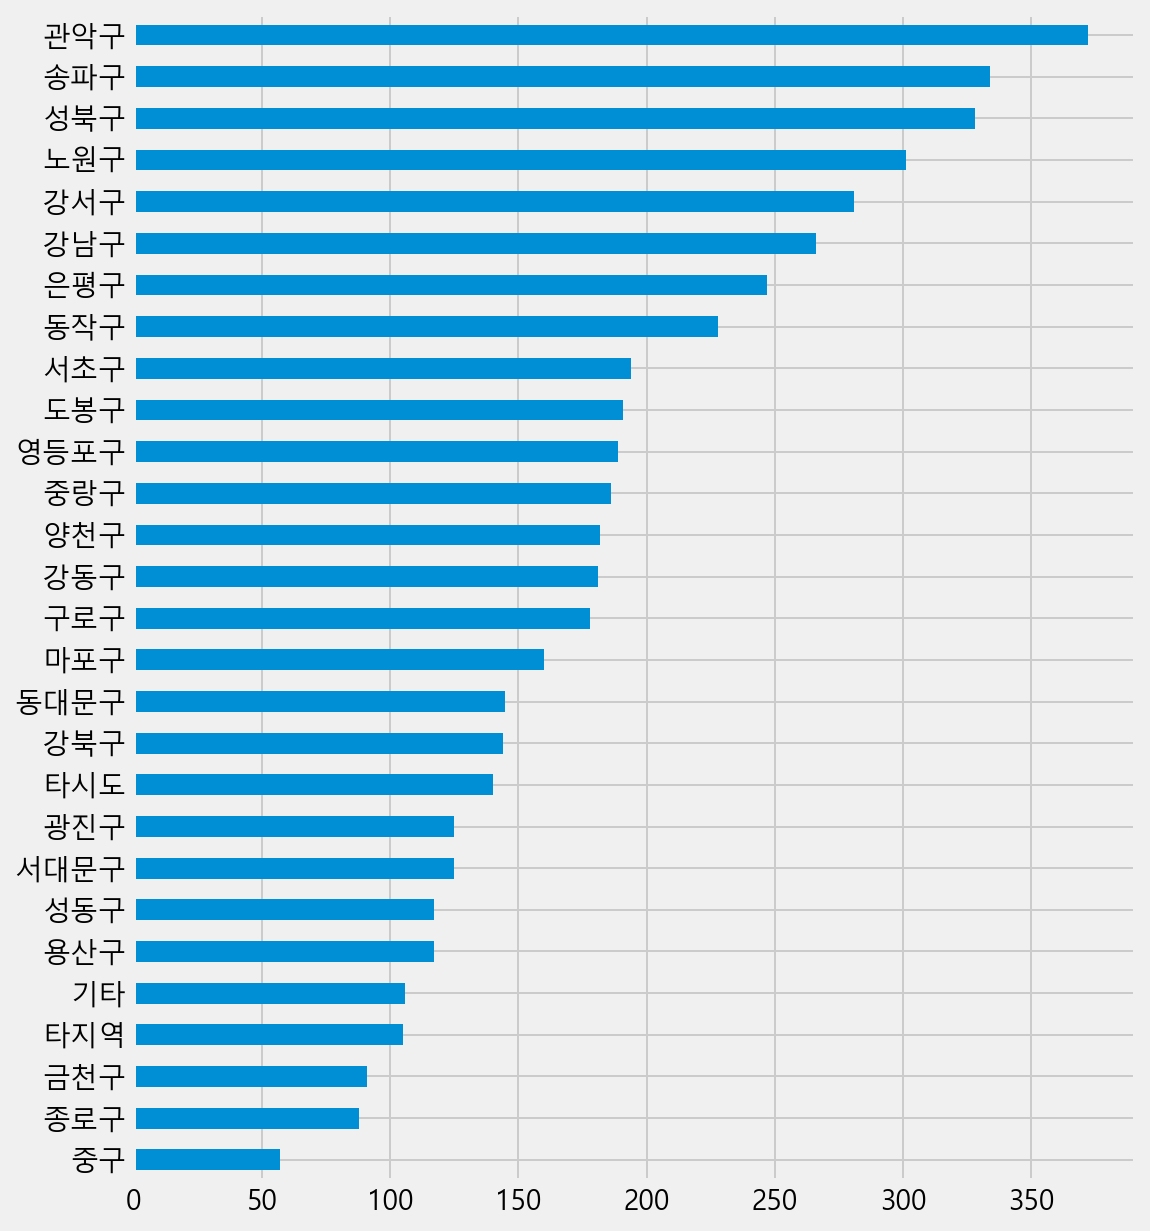

In [74]:
# 위에서 구한 빈도수를 막대그래프로 그립니다.
gu_etc_count.sort_values().plot.barh(figsize=(8, 10))

## 접촉력

In [75]:
# 접촉력 빈도수를 구합니다.
df["접촉력"].value_counts().head(20)

확인 중             865
기타 확진자 접촉        711
성북구 사랑제일교회 관련    641
해외 접촉 추정         389
타시도 확진자 접촉       211
이태원 클럽 관련        139
8.15서울도심집회       126
리치웨이 관련          119
구로구 콜센터 관련        60
노원구 빛가온교회 관련      46
요양시설 관련           43
양천구 운동시설 관련       43
성북구 체대입시 관련       43
확인중               42
구로구 교회 관련         41
용인시 우리제일교회 관련     41
서대문구 세브란스병원       39
콜센터직원 접촉          37
극단 산 관련           37
강남구 K보건산업         37
Name: 접촉력, dtype: int64

In [76]:
# 접촉력의 unique 값만 구합니다.

df["접촉력"].unique()

array(['중랑구 서울의료원', '확인 중', '종로구 서울대병원', '해외 접촉 추정', '강남구 디와이디벨로먼트',
       '강남구 소재 대우디오빌플러스', '관악구 사랑나무 어린이집', '기타 확진자 접촉', '성동구 덕수고 야구부',
       '프로그래머 지인모임', '관악구 삼모스포렉스', '동대문구 성경모임', '타시도 확진자 접촉',
       '강남구 신도벤처타워', '도봉구 예마루데이케어센터', '영등포구 LG트윈타워', '관악구 삼모스포렉스 사우나',
       '강남구 K보건산업', '건축설명회', '종로구청 관련', '강남구 통신판매업', '도봉구 소재 아파트 관련',
       '관악구 지인모임', '영등포 소재 증권회사', '도봉구 소재 아파트', '서대문구 세브란스병원',
       '강남구 소재 금융회사', '동작구 요양시설 관련', '양천구 양천경찰서', '은평구 수색성당',
       '서울지방국세청 관련', '수도권 지인모임', '서대문구 지인모임', '영등포 지인모임', '송파구 우리교회',
       '관악구 에바다 관련', '광진구 혜민병원', '8.15서울도심집회', '도봉구 건설현장', '도봉구 운동시설',
       '송파구 쿠팡 관련', '노원구 빛가온교회 관련', '서초구 장애인교육시설', '강동구 BF모바일 관련',
       '영등포구 일련정종 서울포교소', '동작구 진흥글로벌', '구로구 아파트 관련', 'KT가좌지사 관련',
       '성북구 사랑제일교회 관련', '노원구 기도모임', '관악구 가족모임', '영등포구 국회출입기자관련',
       '은평구 헤어콕 관련', '송파구 소재병원', '극단 산 관련', '영등포구 권능교회', '강동구 소재 병원',
       '다래경매 관련', '성북구 체대입시 관련', '성북구 요양시설', '중구소재 은행 관련', '중랑구 소재 체육시설',
       '동작구 소재 서울신학교', '용인시 우리제일교회 관련', '노원구 손해보험

In [77]:
# "확인" 이 들어가는 접촉력만 찾습니다.

df.loc[df["접촉력"].str.contains("확인"), "접촉력"].unique()

array(['확인 중', '확인중'], dtype=object)

In [78]:
# '확인 중', '확인중' => "확인 중" 으로 변경합니다.

df.loc[df["접촉력"].str.contains("확인"), "접촉력"] = "확인 중"

In [79]:
# "확인" 이 들어가는 접촉력만 찾습니다.

df.loc[df["접촉력"].str.contains("확인"), "접촉력"].unique()

array(['확인 중'], dtype=object)

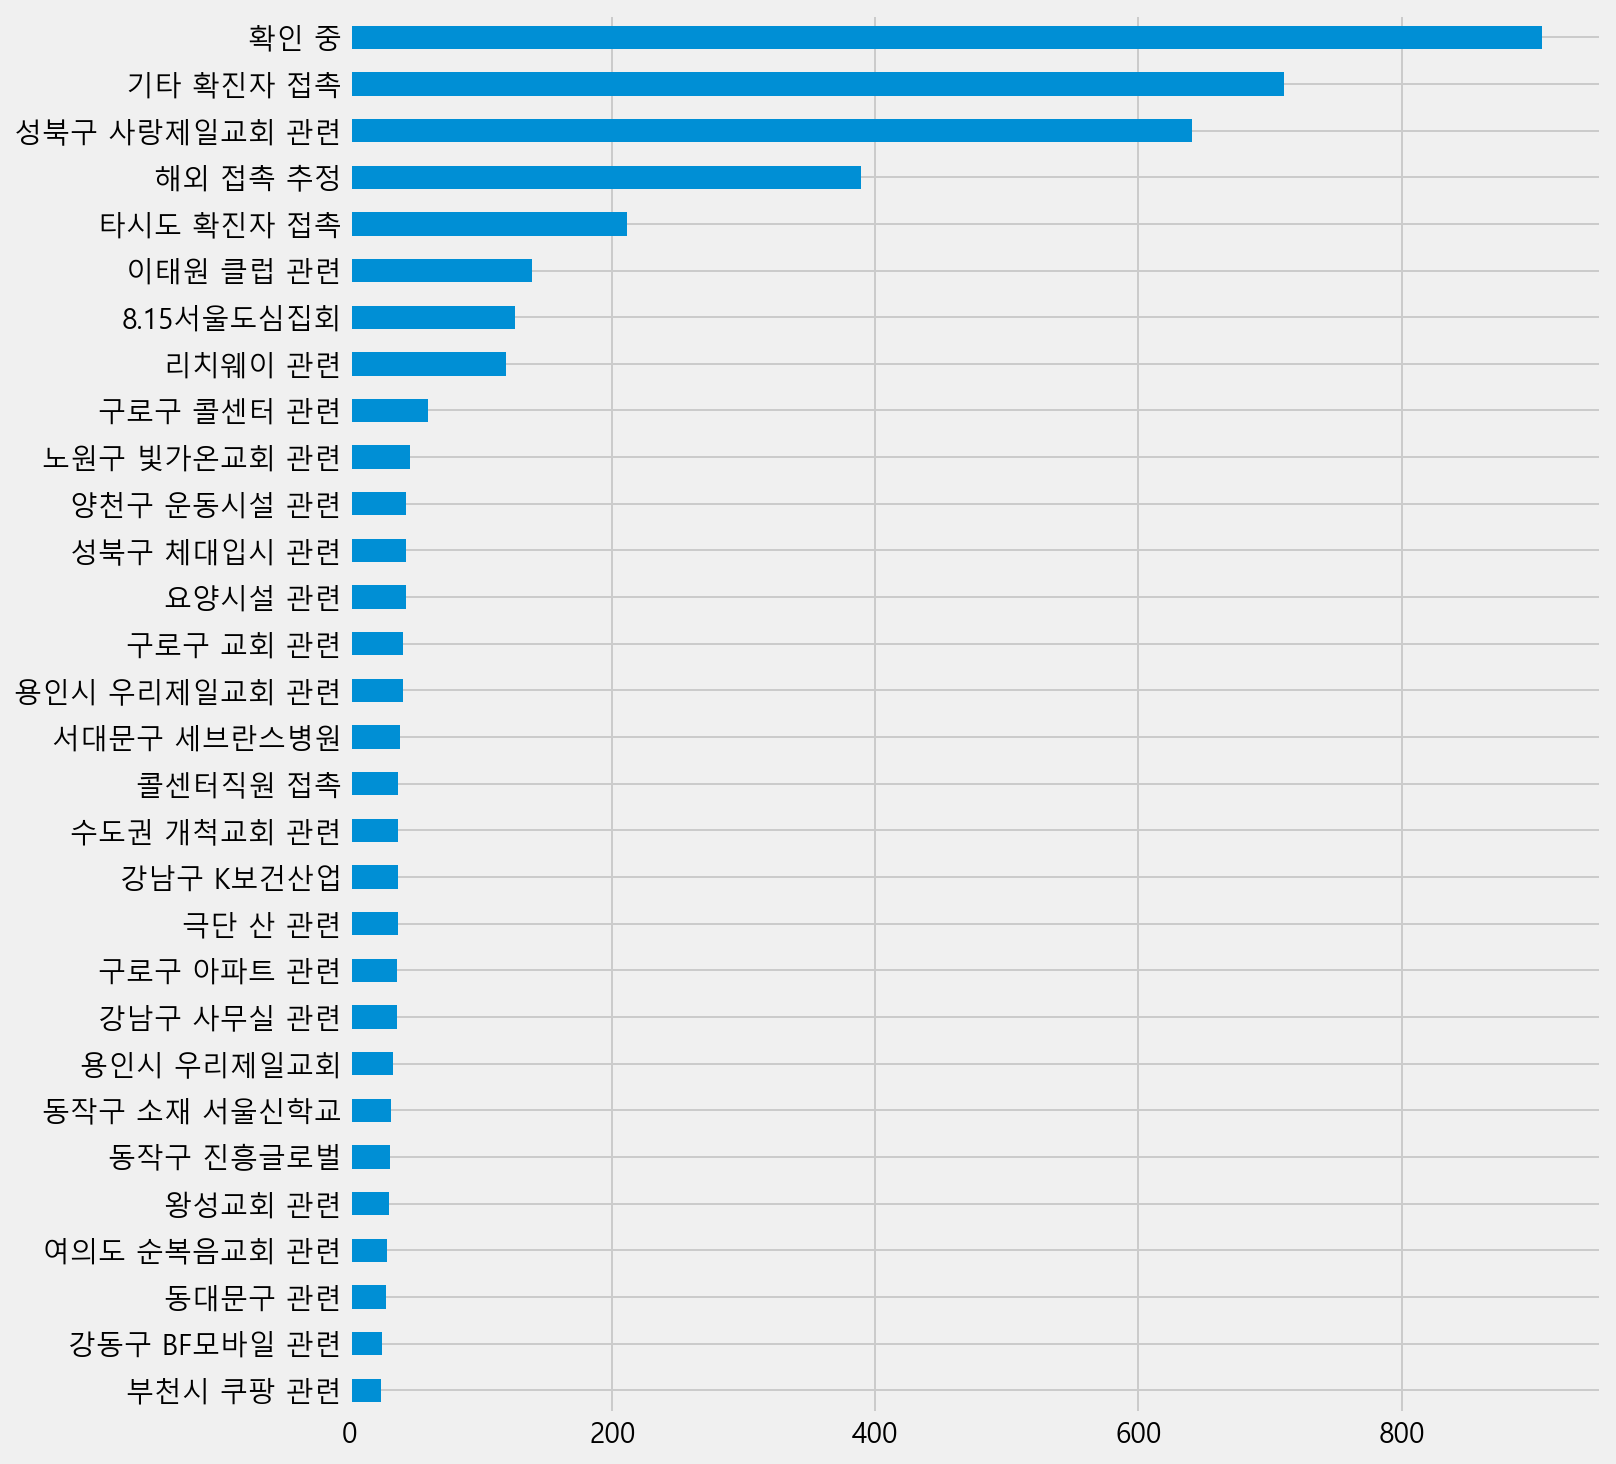

In [80]:
# 접촉력 빈도수를 시각화 합니다.

contact_count = df["접촉력"].value_counts()
contact_count_top = contact_count.sort_values().tail(30)
contact_count_top.plot.barh(figsize=(10, 12))

In [81]:
# 상위 15개만 구합니다.
top_contact = contact_count_top.tail(15)
top_contact

용인시 우리제일교회 관련     41
구로구 교회 관련         41
요양시설 관련           43
성북구 체대입시 관련       43
양천구 운동시설 관련       43
노원구 빛가온교회 관련      46
구로구 콜센터 관련        60
리치웨이 관련          119
8.15서울도심집회       126
이태원 클럽 관련        139
타시도 확진자 접촉       211
해외 접촉 추정         389
성북구 사랑제일교회 관련    641
기타 확진자 접촉        711
확인 중             907
Name: 접촉력, dtype: int64

In [82]:
# 접촉력 빈도수가 높은 목록에 대한 index 값을 구해옵니다.

top_contact.index

Index(['용인시 우리제일교회 관련', '구로구 교회 관련', '요양시설 관련', '성북구 체대입시 관련', '양천구 운동시설 관련',
       '노원구 빛가온교회 관련', '구로구 콜센터 관련', '리치웨이 관련', '8.15서울도심집회', '이태원 클럽 관련',
       '타시도 확진자 접촉', '해외 접촉 추정', '성북구 사랑제일교회 관련', '기타 확진자 접촉', '확인 중'],
      dtype='object')

In [83]:
# 위에서 구한 top_contact 에 해당되는 데이터만 isin 으로 가져옵니다.
top_group = df[df["접촉력"].isin(top_contact.index)]
top_group.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
1,5177,23506,9.25.,강서구,-,확인 중,NaN,2020-09-25,9,39,09-25,강서구
3,5175,23501,9.25.,서초구,-,해외 접촉 추정,NaN,2020-09-25,9,39,09-25,서초구
7,5171,23498,9.25.,종로구,-,기타 확진자 접촉,NaN,2020-09-25,9,39,09-25,종로구
9,5169,23496,9.25.,강남구,-,기타 확진자 접촉,NaN,2020-09-25,9,39,09-25,강남구
10,5168,23495,9.25.,강남구,-,기타 확진자 접촉,NaN,2020-09-25,9,39,09-25,강남구


In [84]:
# 접촉력, 월별 빈도수를 groupby 로 구합니다.
top_group.groupby(["접촉력", "월"])["연번"].count().unstack().fillna(0).astype(int)

월,2,3,4,5,6,7,8,9
접촉력,,,,,,,,
8.15서울도심집회,0,0,0,0,0,0,113,13
구로구 교회 관련,0,35,6,0,0,0,0,0
구로구 콜센터 관련,0,60,0,0,0,0,0,0
기타 확진자 접촉,0,0,0,0,0,0,417,294
노원구 빛가온교회 관련,0,0,0,0,0,0,35,11
리치웨이 관련,0,0,0,0,119,0,0,0
성북구 사랑제일교회 관련,0,0,0,0,0,0,628,13
성북구 체대입시 관련,0,0,0,0,0,0,39,4
양천구 운동시설 관련,0,0,0,0,43,0,0,0


### 이태원 클럽 관련
* 이태원 클럽 전파는 5월에 시작되었으나 6월에도 확진자가 있습니다.
* 6월에 이태원 클럽관련 확진자를 찾아봅니다.

In [85]:
df[df["접촉력"].str.contains("이태원") & (df["월"] == 6)]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
4198,980,11785,6.06.,성동구,-,이태원 클럽 관련,퇴원,2020-06-06,6,23,06-06,성동구
4213,965,11742,6.06.,은평구,-,이태원 클럽 관련,퇴원,2020-06-06,6,23,06-06,은평구
4222,956,11751,6.06.,성동구,-,이태원 클럽 관련,퇴원,2020-06-06,6,23,06-06,성동구
4229,949,11709,6.05.,은평구,-,이태원 클럽 관련,퇴원,2020-06-05,6,23,06-05,은평구
4244,934,11687,6.05.,성동구,-,이태원 클럽 관련,퇴원,2020-06-05,6,23,06-05,성동구
4302,876,11535,6.01.,강동구,-,이태원 클럽 관련,퇴원,2020-06-01,6,23,06-01,강동구


### 감염경로 불명

In [86]:
# "접촉력" 이 "확인 중"인 데이터만 구합니다.

df_unknown = df[df["접촉력"] == "확인 중"]
df_unknown.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
1,5177,23506,9.25.,강서구,-,확인 중,NaN,2020-09-25,9,39,09-25,강서구
16,5162,23507,9.25.,관악구,-,확인 중,NaN,2020-09-25,9,39,09-25,관악구
18,5160,23474,9.25.,구로구,-,확인 중,NaN,2020-09-25,9,39,09-25,구로구
21,5157,23483,9.25.,동작구,-,확인 중,NaN,2020-09-25,9,39,09-25,동작구
26,5152,23444,9.24.,관악구,-,확인 중,NaN,2020-09-24,9,39,09-24,관악구


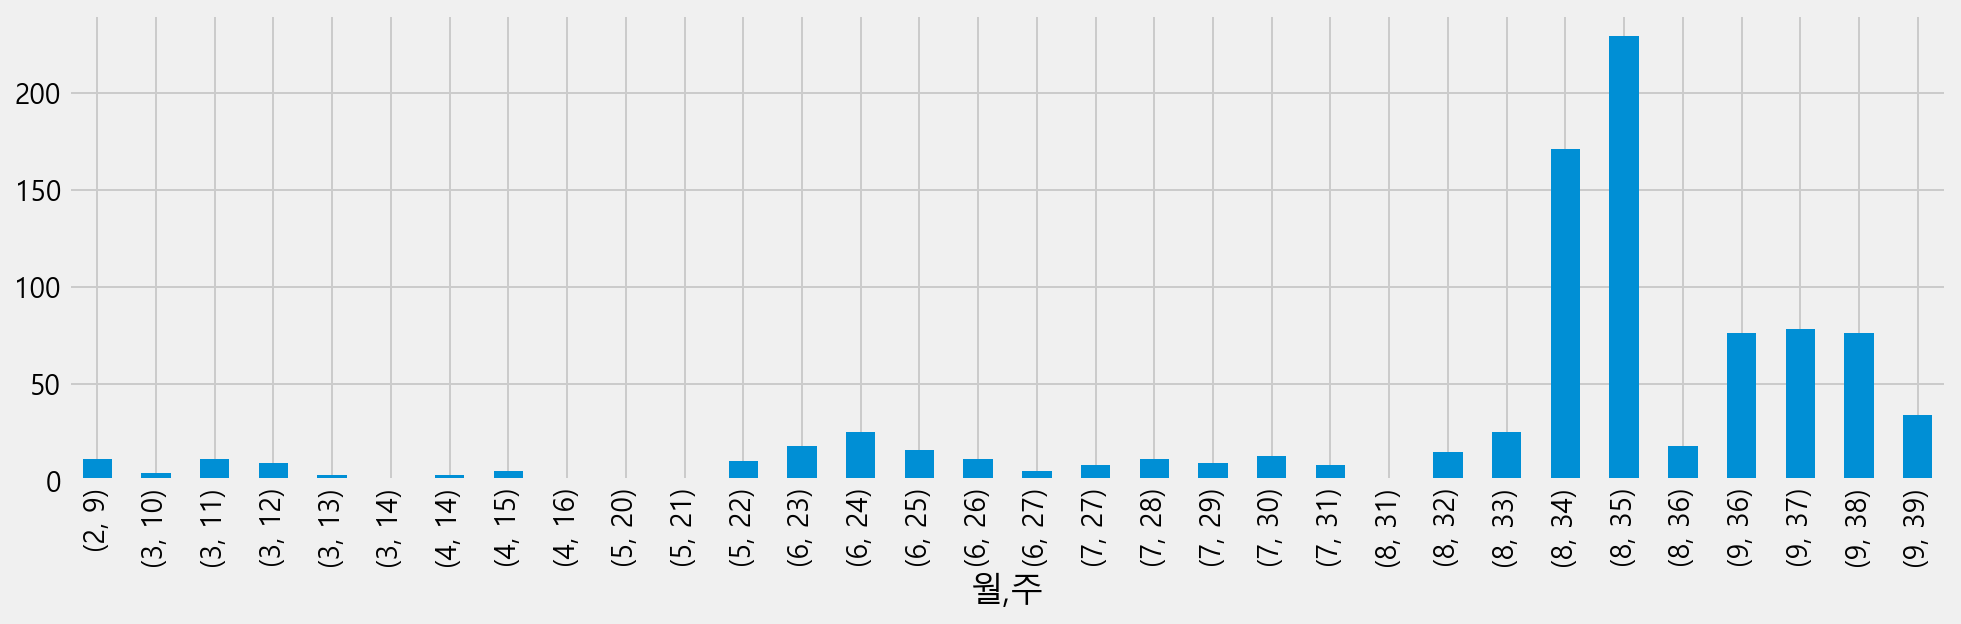

In [87]:
# 감염경로 불명이 어느정도인지 봅니다.
unknown_weekly_case = df_unknown.groupby(["월", "주"])["연번"].count()
unknown_weekly_case.plot.bar(figsize=(15, 4))

In [88]:
# 전체 확진수를 value_counts 로 구하고 데이터프레임 형태로 만듭니다.
#아래에서 merge해주기 위하여 DataFrame으로 바꿔줌
all_weekly_case = df["주"].value_counts().to_frame()
all_weekly_case.columns = ["전체확진수"]
all_weekly_case.head()

,전체확진수
35,924
34,913
36,458
33,390
37,341


In [89]:
# 전체 확진수를 value_counts 로 구하고 데이터프레임 형태로 만듭니다.
unknown_weekly_case = df_unknown["주"].value_counts().to_frame()
unknown_weekly_case.columns = ["불명확진수"]
unknown_weekly_case.head()

,불명확진수
35,229
34,171
36,94
37,78
38,76


In [90]:
# all_weekly_case 와 unknown_weekly_case 를 비교해 봅니다.

unknown_case = all_weekly_case.merge(unknown_weekly_case, left_index=True, right_index=True)
unknown_case = unknown_case.sort_index()
unknown_case.head()

,전체확진수,불명확진수
9,62,11
10,37,4
11,124,11
12,76,9
13,105,3


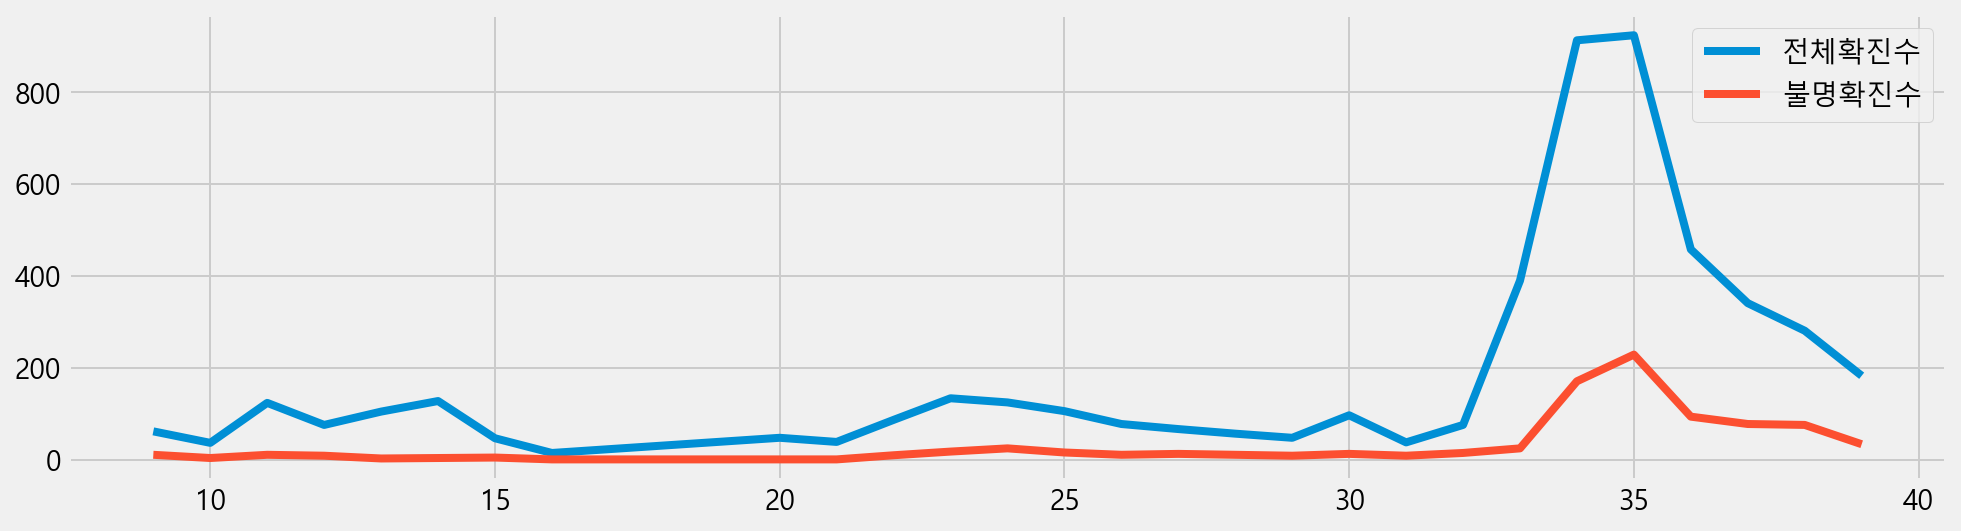

In [91]:
# 위에서 구한 결과를 시각화 합니다.

unknown_case.plot(figsize=(15, 4))

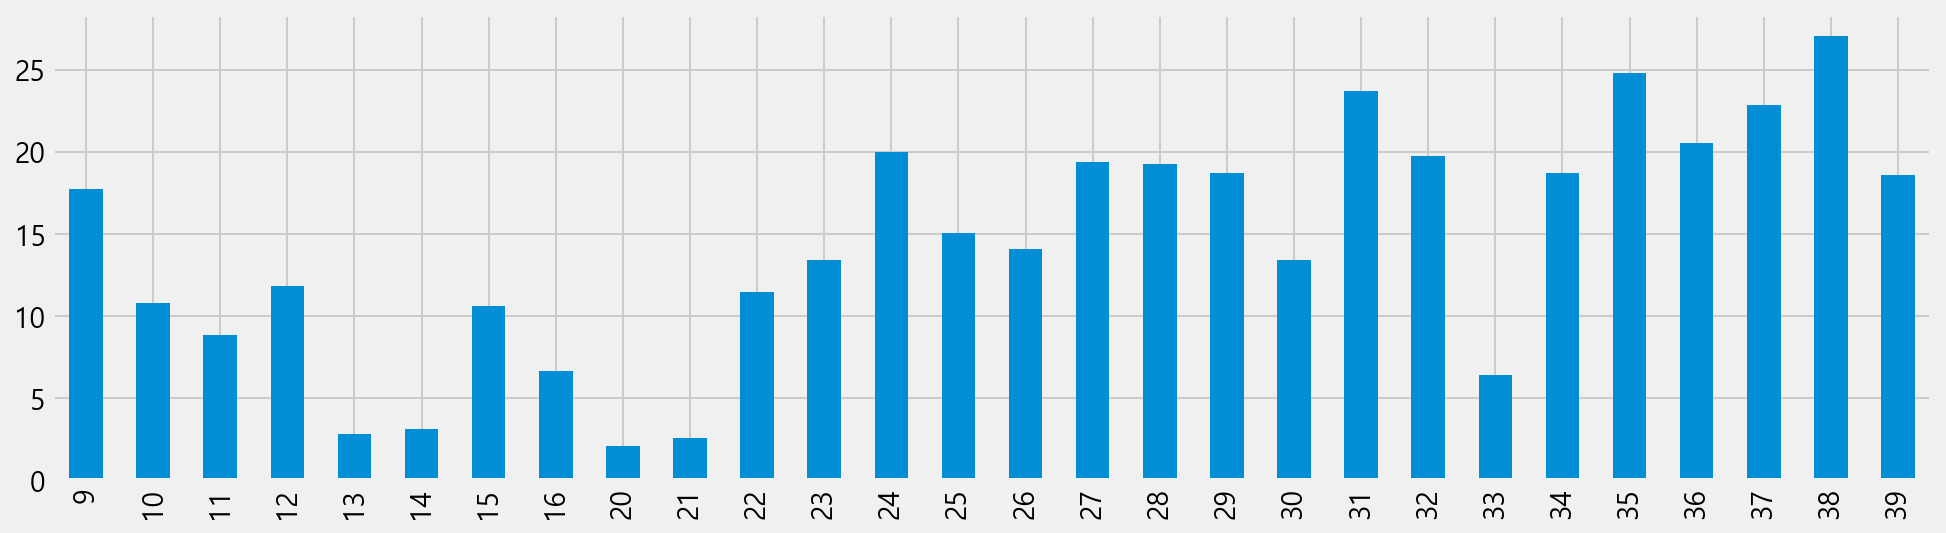

In [92]:
# 감염경로 "확인 중"의 주별 비율

unknown_case["확인중비율"] = (unknown_case["불명확진수"] / unknown_case["전체확진수"]) * 100
unknown_case["확인중비율"].plot.bar(figsize=(15, 4))

## 가장 많은 전파가 일어난 번호
* [정규 표현식 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%A0%95%EA%B7%9C_%ED%91%9C%ED%98%84%EC%8B%9D)


* 파이썬 공식문서 정규표현식 참고하기 : 
    * https://docs.python.org/3.8/library/re.html#re.sub
    
    
* 문자열 바꾸기 : re.sub("규칙", "패턴", "데이터")
    * https://docs.python.org/3.8/library/re.html#text-munging


* 정규표현식 문자열 패턴
    * https://docs.python.org/3.8/howto/regex.html#matching-characters

    
    
* [    ] : 일치시킬 문자 세트의 패턴
* [가나다] : 가 or 나 or 다 중에 하나를 포함하고 있는지
* [가-힣] : 한글 가부터 힣까의 문자 중 하나를 포함하고 있는지
* [0-9] : 0~9까지의 숫자 중 하나를 포함하고 있는지
* [^0-9] : 숫자를 포함하고 있지 않음
* [^가-힣] : 한글이 포함되어 있지 않음
* [가-힣+] : 한글이 하나 이상 포함되는지


In [93]:
import re
# 정규표현식 라이브러리를 불러옵니다.
# 숫자외의 데이터는 제거하는 정규표현식
# #7265 접촉(추정)


In [94]:
# 함수를 통해 숫자외의 문자를 제거하는 get_number 함수를 만듭니다.

def get_number(text):
    return re.sub("[^0-9]", "", text)

get_number("#7265 접촉(추정)")

'7265'

In [95]:
# 함수를 map을 통해 접촉번호를 구합니다.

df["접촉번호"] = df["접촉력"].map(get_number)
contact = df["접촉번호"].value_counts().reset_index()
contact.head()

,index,접촉번호
0,,4963
1,815,126
2,6,4
3,9734,4
4,8486,3


In [96]:
# 접촉번호가 없는 0번 행은 drop 으로 삭제합니다.
# 한번 drop 한 셀을 다시 drop 하면 이미 삭제를 했는데 다시 삭제하려 하기 때문에 KeyError 가 납니다. 
# 다시 실행했을 때 KeyError 가 발생하는 것이 정상입니다.

df_contact = contact.drop(0)
df_contact = df_contact.head(10)
df_contact

,index,접촉번호
1,815,126
2,6,4
3,9734,4
4,8486,3
5,8271,3
6,14483,3
7,780,3
8,8791,3
9,8717,2
10,8669,2


In [97]:
# 상위 10개의 접촉번호를 구해서 top_contact_no 변수에 할당하고 재사용합니다.

top_contact_no = df_contact["index"]

In [98]:
# contact의 환자번호와 df의 접촉번호를 merge 합니다.

df[df["접촉번호"].isin(top_contact_no)]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역,접촉번호
504,4674,22192,9.13.,마포구,-,8.15서울도심집회,NaN,2020-09-13,9,37,09-13,마포구,815
662,4516,21669,9.09.,노원구,-,8.15서울도심집회,NaN,2020-09-09,9,37,09-09,노원구,815
743,4435,21494,9.07.,강서구,-,8.15서울도심집회,NaN,2020-09-07,9,37,09-07,강서구,815
801,4377,21314,9.07.,구로구,-,8.15서울도심집회,퇴원,2020-09-07,9,37,09-07,구로구,815
836,4342,21210,9.06.,노원구,-,8.15서울도심집회,NaN,2020-09-06,9,36,09-06,노원구,815
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5145,33,797,2.24.,송파구,-,#780 접촉(추정),퇴원,2020-02-24,2,9,02-24,송파구,780
5161,17,83,2.20.,종로구,-,#6 접촉(추정),퇴원,2020-02-20,2,8,02-20,종로구,6
5168,10,21,2.5.,성북구,-,#6 접촉,퇴원,2020-02-05,2,6,02-05,성북구,6
5171,7,11,1.31.,종로구,-,#6 접촉,퇴원,2020-01-31,1,5,01-31,종로구,6


## 조치사항

In [99]:
# 조치사항에 대한 빈도수를 세어봅니다.
# value_counts 는 Series 에만 사용할 수 있습니다.
# 단일 변수의 빈도수를 세는데 사용합니다.

df["퇴원현황"].value_counts()

퇴원    4315
사망      53
Name: 퇴원현황, dtype: int64

## 퇴원, 사망여부

In [100]:
# 조치사항 컬럼을 통해 퇴원과 사망 컬럼을 새로 만듭니다.
# 또, 어느 병원에 조치되었는지도 병원 컬럼을 만들어서 담습니다.

df["퇴원"] = df["퇴원현황"].str.contains("퇴원")
df["사망"] = df["퇴원현황"].str.contains("사망")

In [101]:
# 데이터 수집 시점에서 퇴원하지 못한 환자수

df["퇴원"].value_counts()

True     4315
False      53
Name: 퇴원, dtype: int64

In [102]:
# 퇴원여부 빈도수에 대한 비율을 구합니다.

df["퇴원"].value_counts(normalize=True)

True     0.987866
False    0.012134
Name: 퇴원, dtype: float64

In [103]:
# 사망여부에 따른 빈도수를 구합니다.

df["사망"].value_counts()

False    4315
True       53
Name: 사망, dtype: int64

In [104]:
# 사망 여부에 따른 빈도수의 비율을 구합니다.
df["사망"].value_counts(normalize=True) * 100

False    98.78663
True      1.21337
Name: 사망, dtype: float64

* 데이터 수집 시점 기준 현재까지 입원해 있는 확진자 중 가장 오래 입원해 있는 확진자

In [105]:
# 데이터 수집 시점 기준 현재까지 입원해 있는 확진자 중 가장 오래 입원해 있는 확진자
#없음
df[(df["퇴원"] == False) & (df["사망"] == False) & (df["지역"] != "타지역")].tail(5)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역,접촉번호,퇴원,사망


## 여행력

In [107]:
# "해외" 라는 컬럼을 만들어 데이터를 전처리 합니다.
# "여행력"에 "-" 문자가 들어가 있으면 결측치로 처리합니다.
df["해외"] = df["여행력"]
df["해외"] = df["해외"].str.strip()
df["해외"] = df["해외"].replace("-", np.nan)
df["해외"].nunique()

77

In [108]:
# describe 로 요약을 합니다.
# count : 빈도수
# unique : 병원수
# top : 가장 많은 빈도로 등장하는 텍스트
# freq : 가장 많은 빈도의 횟수
df["해외"].describe()

count     413
unique     77
top        미국
freq      141
Name: 해외, dtype: object

In [109]:
df["해외"].value_counts().head(10)

미국        141
영국         48
필리핀        24
스페인        12
우즈베키스탄     11
프랑스        11
카자흐스탄      10
이라크        10
일본          8
인도          8
Name: 해외, dtype: int64

### 여행력이 있는 데이터만 가져와서 서브셋 만들기

In [110]:
# "해외" 컬럼의 값이 결측치가 아닌 데이터만 가져와서 
# df_oversea 라는 새로운 데이터프레임에 담습니다.
df_oversea = df[df["해외"].notnull()].copy()
df_oversea.shape

(413, 16)

In [111]:
# 중복되는 지역명이 있는지 확인합니다.
df_oversea["해외"].unique()

array(['카타르', '인도', '네팔', '우즈베키스탄', '미국', '우크라이나', '필리핀', '에콰도르',
       '키르기즈스탄', '파라과이', '인도네시아', '멕시코, 미국', '카자흐스탄', '영국', '독일', '중국',
       '이집트', '21263', '터키', '사우디아라비아', '베트남', '에티오피아', '스페인', '프랑스',
       '케냐', '일본', '방글라데시', '멕시코', '홍콩', '러시아', '이라크', '키르기스스탄',
       '모로코, 터키', '쿠웨이트', '나이지리아', '미국, 멕시코', '페루', '아랍에미리트', 'UAE',
       '파키스탄', '아일랜드', '콩코, 프랑스', '캐나다', '페루, 미국',
       '프랑스, 스페인, 독일, 이탈리아, 네덜란드', '팔라우', '호주, 인도네시아', '이탈리아', '포르투칼',
       '브라질', '미국, 캐나다, 멕시코', '미국 뉴욕', '오스트리아', '미국, 브라질', '태국',
       '아르헨티나, 볼리비아, 브라질', '폴란드', '말레이시아', '필리핀, 마닐라',
       '브라질, 아르헨티아, 칠레, 볼리비아', '프랑스, 독일', '미국, 캐나다', '스페인, 카타르',
       '이탈리아, 프랑스', '체코, 헝가리, 오스트리아, 이탈리아, 프랑스', '모로코, 프랑스, 오스트리아',
       '영국, 프랑스', '스페인,체코', '독일,프랑스', '프랑스, 스페인', '스페인, 프랑스',
       '이탈리아, 독일, 홍콩', '중국 청도', '우한교민', '중국 우한시', '싱가포르', '우한 교민'],
      dtype=object)

### 텍스트 데이터 다루기
[Working with text data — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#testing-for-strings-that-match-or-contain-a-pattern)

In [112]:
# 유럽 지역을 방문했다면 유럽이라고 바꿔주기 위해 국가명을 str.contains 로 검색하기 위한 형태로 만듭니다.
europe = "체코, 헝가리, 오스트리아, 이탈리아, 프랑스, 모로코, 독일, 스페인, 영국, 폴란드, 터키, 아일랜드"
europe = europe.replace(", ", "|")
df_oversea[df_oversea["해외"].str.contains(europe)].head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역,접촉번호,퇴원,사망,해외
1356,3822,19817,8.29.,기타,영국,해외 접촉 추정,퇴원,2020-08-29,8,35,08-29,기타,,True,False,영국
1357,3821,19816,8.29.,기타,독일,해외 접촉 추정,퇴원,2020-08-29,8,35,08-29,기타,,True,False,독일
1681,3497,19000,8.27.,관악구,터키,해외 접촉 추정,퇴원,2020-08-27,8,35,08-27,관악구,,True,False,터키
3098,2080,15566,8.17.,마포구,스페인,해외 접촉 추정,퇴원,2020-08-17,8,34,08-17,마포구,,True,False,스페인
3198,1980,15193,8.15.,타시도,프랑스,확인 중,퇴원,2020-08-15,8,33,08-15,타시도,,True,False,프랑스


In [113]:
# 남미 지역에 해당되는 국가명을 str.contains 로 검색하기 위한 형태로 만듭니다.
south_america = "브라질, 아르헨티아, 칠레, 볼리비아, 멕시코, 페루"
south_america = south_america.replace(", ", "|")
south_america

'브라질|아르헨티아|칠레|볼리비아|멕시코|페루'

In [114]:
# 중복되는 국가나 지역을 특정 텍스트로 변경해서 그룹화 해서 빈도수를 세어볼 예정입니다.
# .str.contains 와 .loc 를 사용해서 전처리 합니다.
df_oversea.loc[df_oversea["해외"].str.contains(europe), "해외"] = "유럽"
df_oversea.loc[df_oversea["해외"].str.contains(south_america), "해외"] = "남미"
df_oversea.loc[df_oversea["해외"].str.contains("중국|우한"), "해외"] = "중국"
df_oversea.loc[df_oversea["해외"].str.contains("아랍에미리트"), "해외"] = "UAE"
df_oversea.loc[df_oversea["해외"].str.contains("필리핀"), "해외"] = "필리핀"
df_oversea.loc[df_oversea["해외"].str.contains("미국"), "해외"] = "미국"
df_oversea["해외"].value_counts()

미국           143
유럽           102
필리핀           26
남미            22
우즈베키스탄        11
이라크           10
카자흐스탄         10
중국             9
일본             8
인도             8
태국             6
캐나다            5
러시아            5
인도네시아          5
UAE            5
키르기스스탄         4
파키스탄           4
베트남            3
우크라이나          2
사우디아라비아        2
팔라우            2
방글라데시          2
에콰도르           2
네팔             2
이집트            2
싱가포르           1
케냐             1
파라과이           1
21263          1
포르투칼           1
홍콩             1
말레이시아          1
키르기즈스탄         1
나이지리아          1
호주, 인도네시아      1
에티오피아          1
쿠웨이트           1
카타르            1
Name: 해외, dtype: int64

In [115]:
# describe 로 요약을 합니다.
# count : 빈도수
# unique : 병원수
# top : 가장 많은 빈도로 등장하는 텍스트
# freq : 가장 많은 빈도의 횟수
df_oversea["해외"].describe()

count     413
unique     38
top        미국
freq      143
Name: 해외, dtype: object

In [116]:
# 확진일자, 해외 별 카운트 수를 구합니다.

day_oversea = df_oversea.groupby(["확진일자", "해외"])["연번"].count()
day_oversea.head()

확진일자        해외  
2020-01-24  중국      1
2020-01-30  중국      2
2020-02-02  중국      1
2020-02-05  싱가포르    1
2020-02-06  중국      1
Name: 연번, dtype: int64

In [117]:
# 위에서 구한 값을 바탕으로 지역별 누적 확진수를 구합니다.
#level옵션은 0일 경우 확진일자를 나타내며 1일 경우 해외를 나타냄
day_oversea = day_oversea.groupby(level=[1]).cumsum()
day_oversea

확진일자        해외    
2020-01-24  중국         1
2020-01-30  중국         3
2020-02-02  중국         4
2020-02-05  싱가포르       1
2020-02-06  중국         5
                      ..
2020-09-15  우즈베키스탄    10
2020-09-16  우즈베키스탄    11
2020-09-18  네팔         2
2020-09-20  인도         8
2020-09-21  카타르        1
Name: 연번, Length: 254, dtype: int64

In [118]:
# 위에서 구한 값을 reset_index() 를 통해 데이터프레임으로 변경하고 "연번" 컬럼을 "확진자수"로 변경합니다.

df_day_oversea = day_oversea.reset_index()
df_day_oversea = df_day_oversea.rename(columns={"연번":"누적확진수"})
df_day_oversea.head()

,확진일자,해외,누적확진수
0,2020-01-24,중국,1
1,2020-01-30,중국,3
2,2020-02-02,중국,4
3,2020-02-05,싱가포르,1
4,2020-02-06,중국,5


In [119]:
# "해외" 컬럼의 빈도수를 구합니다.
oversea_count = df_oversea["해외"].value_counts()

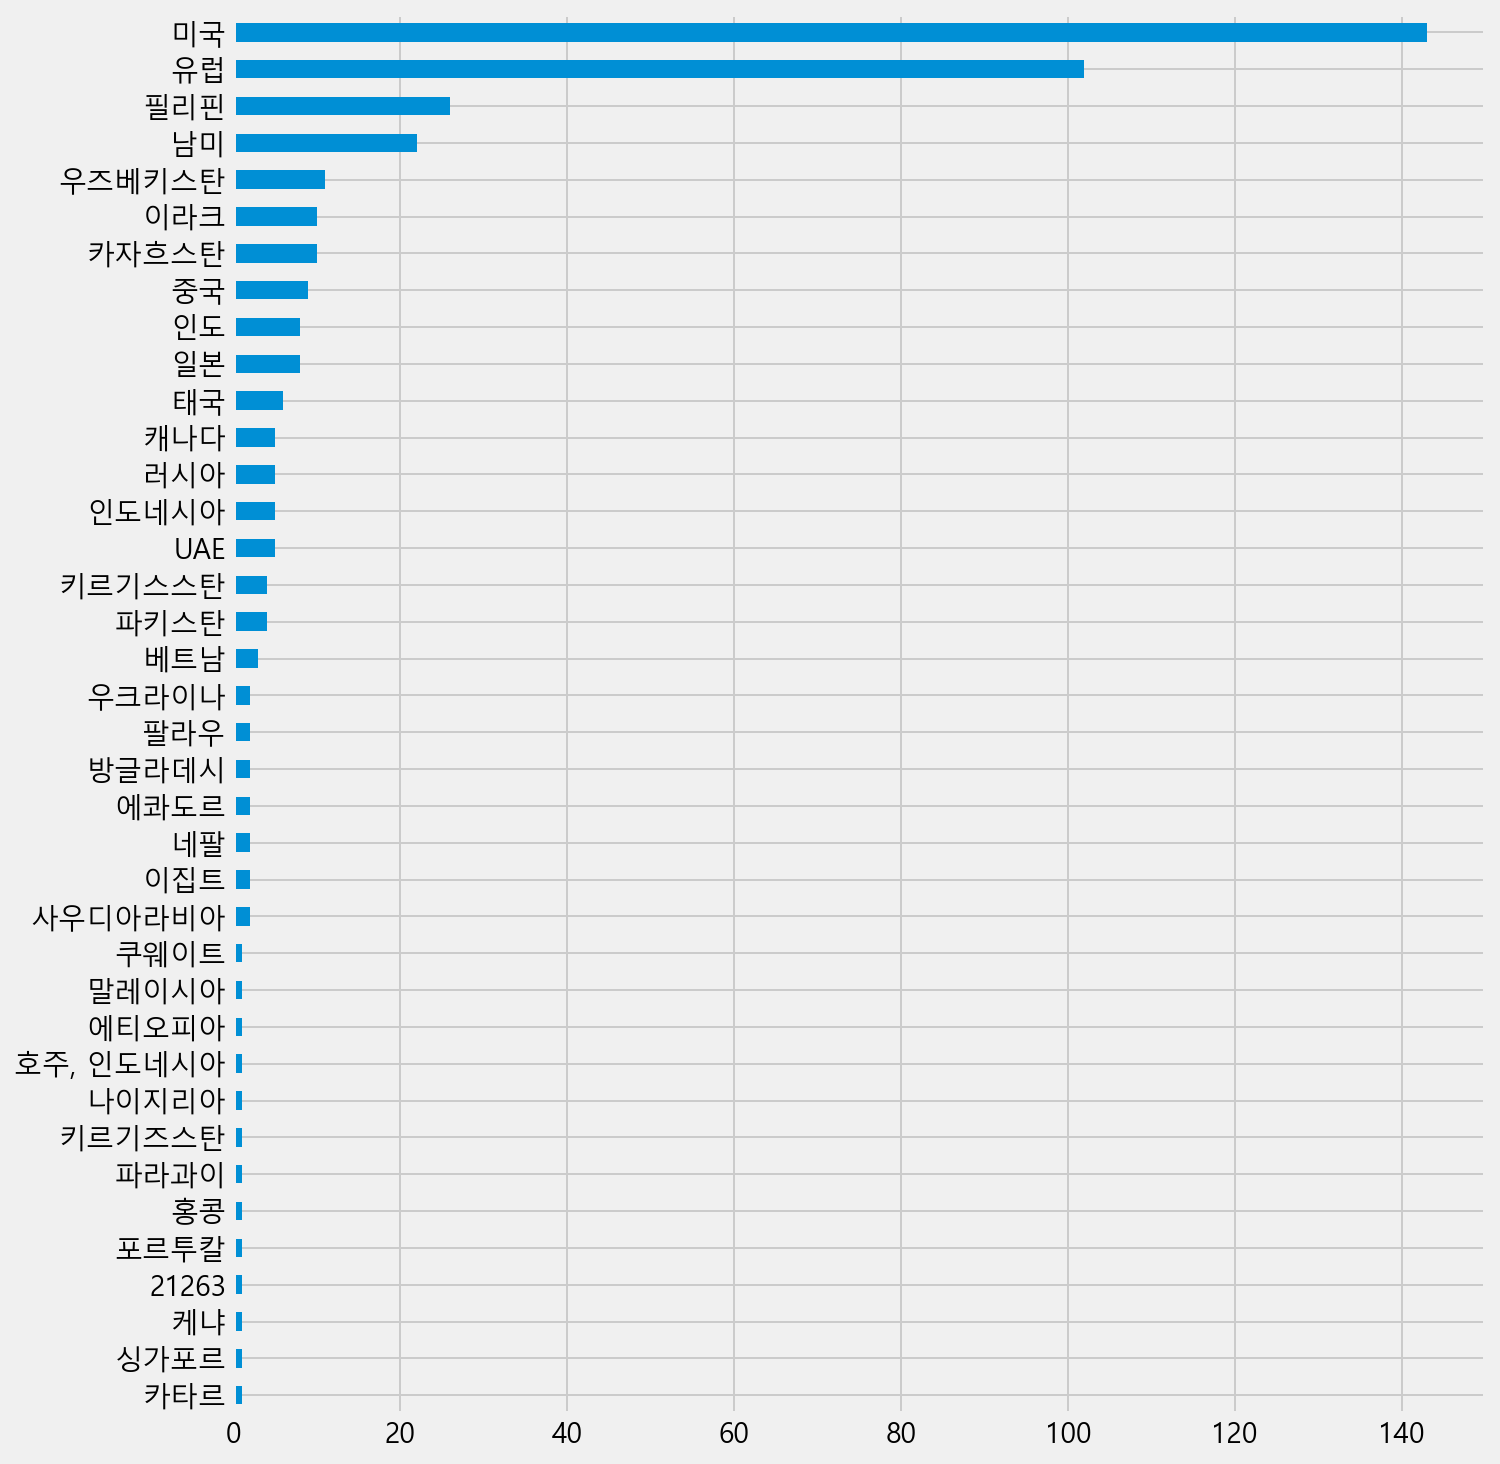

In [120]:
# 위에서 구한 빈도수를 시각화 합니다.
oversea_count.sort_values().plot.barh(figsize=(10, 12))

In [121]:
df_day_oversea = df_day_oversea.set_index("확진일자")

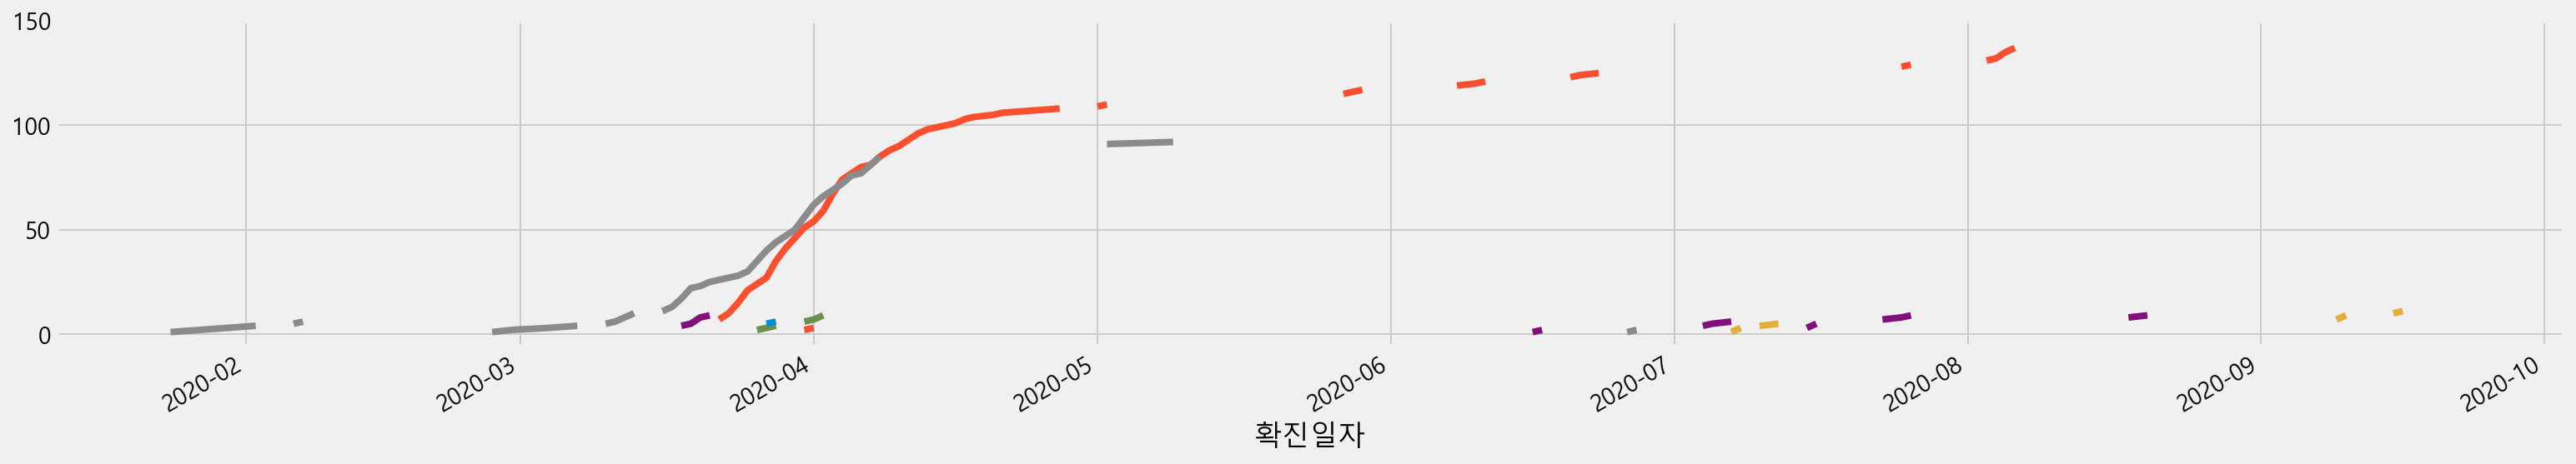

In [123]:
df_day_oversea.pivot(columns="해외").plot(figsize=(24, 4), legend=False)

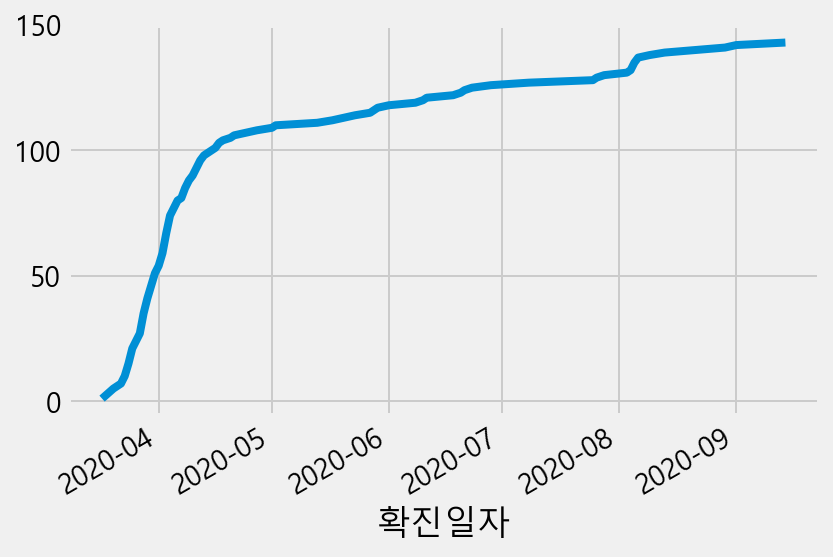

In [124]:
df_day_oversea.loc[df_day_oversea["해외"] == "미국", "누적확진수"].plot()

In [125]:
oversea_count_gu = df_oversea["지역"].value_counts()
oversea_count_gu.head()

강남구    45
서초구    30
송파구    26
마포구    25
타지역    24
Name: 지역, dtype: int64

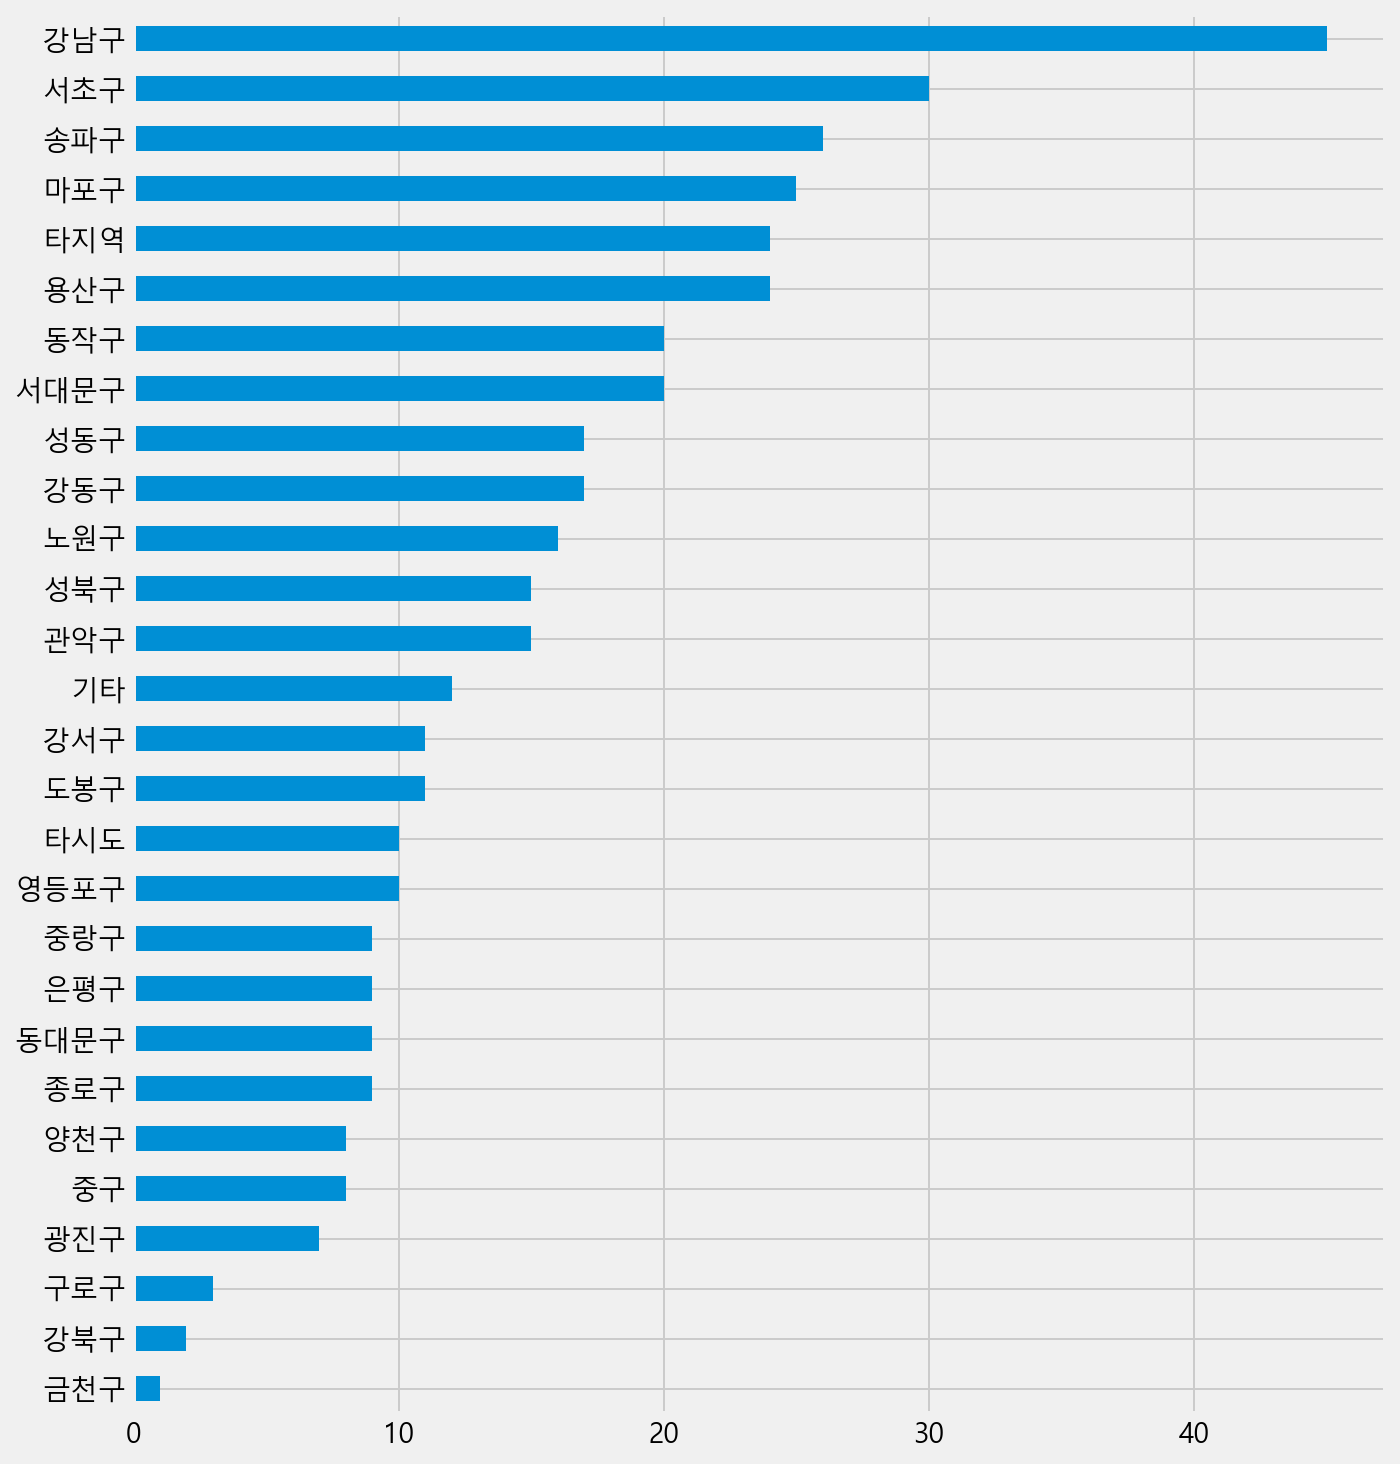

In [126]:
# "해외유입 구별 확진자" 시각화 하기

oversea_count_gu.sort_values().plot.barh(figsize=(10, 12))

### 전체확진수와 해외유입 확진수 비교

In [127]:
# all_count_gu 변수에 전체 지역의 확진자수 구하기
all_count_gu = df["지역"].value_counts()

In [128]:
# 데이터프레임으로 변환하고 컬럼명 변경하기

df_all_gu = all_count_gu.to_frame()
df_all_gu.columns = ["전체확진수"]
df_all_gu

,전체확진수
관악구,372
송파구,334
성북구,328
노원구,301
강서구,281
강남구,266
은평구,247
동작구,228
서초구,194
도봉구,191


In [129]:
# 해외유입확진수 구하기

df_oversea_gu = pd.DataFrame({"해외유입확진수" : oversea_count_gu})

### merge 를 통해 전체 확진수와 해외유입확진수 비교하기
* 이미지 출처 및 Pandas 공식문서 보기 : [How to combine data from multiple tables? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/08_combine_dataframes.html#join-tables-using-a-common-identifier)

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/08_merge_left.svg">

In [130]:
# merge 로 합쳐서 전체확진수와 해외유입확진수 비교해 보기

df_all_oversea_case = df_all_gu.merge(df_oversea_gu, left_index=True, right_index=True)
df_all_oversea_case.head()

,전체확진수,해외유입확진수
관악구,372,15
송파구,334,26
성북구,328,15
노원구,301,16
강서구,281,11


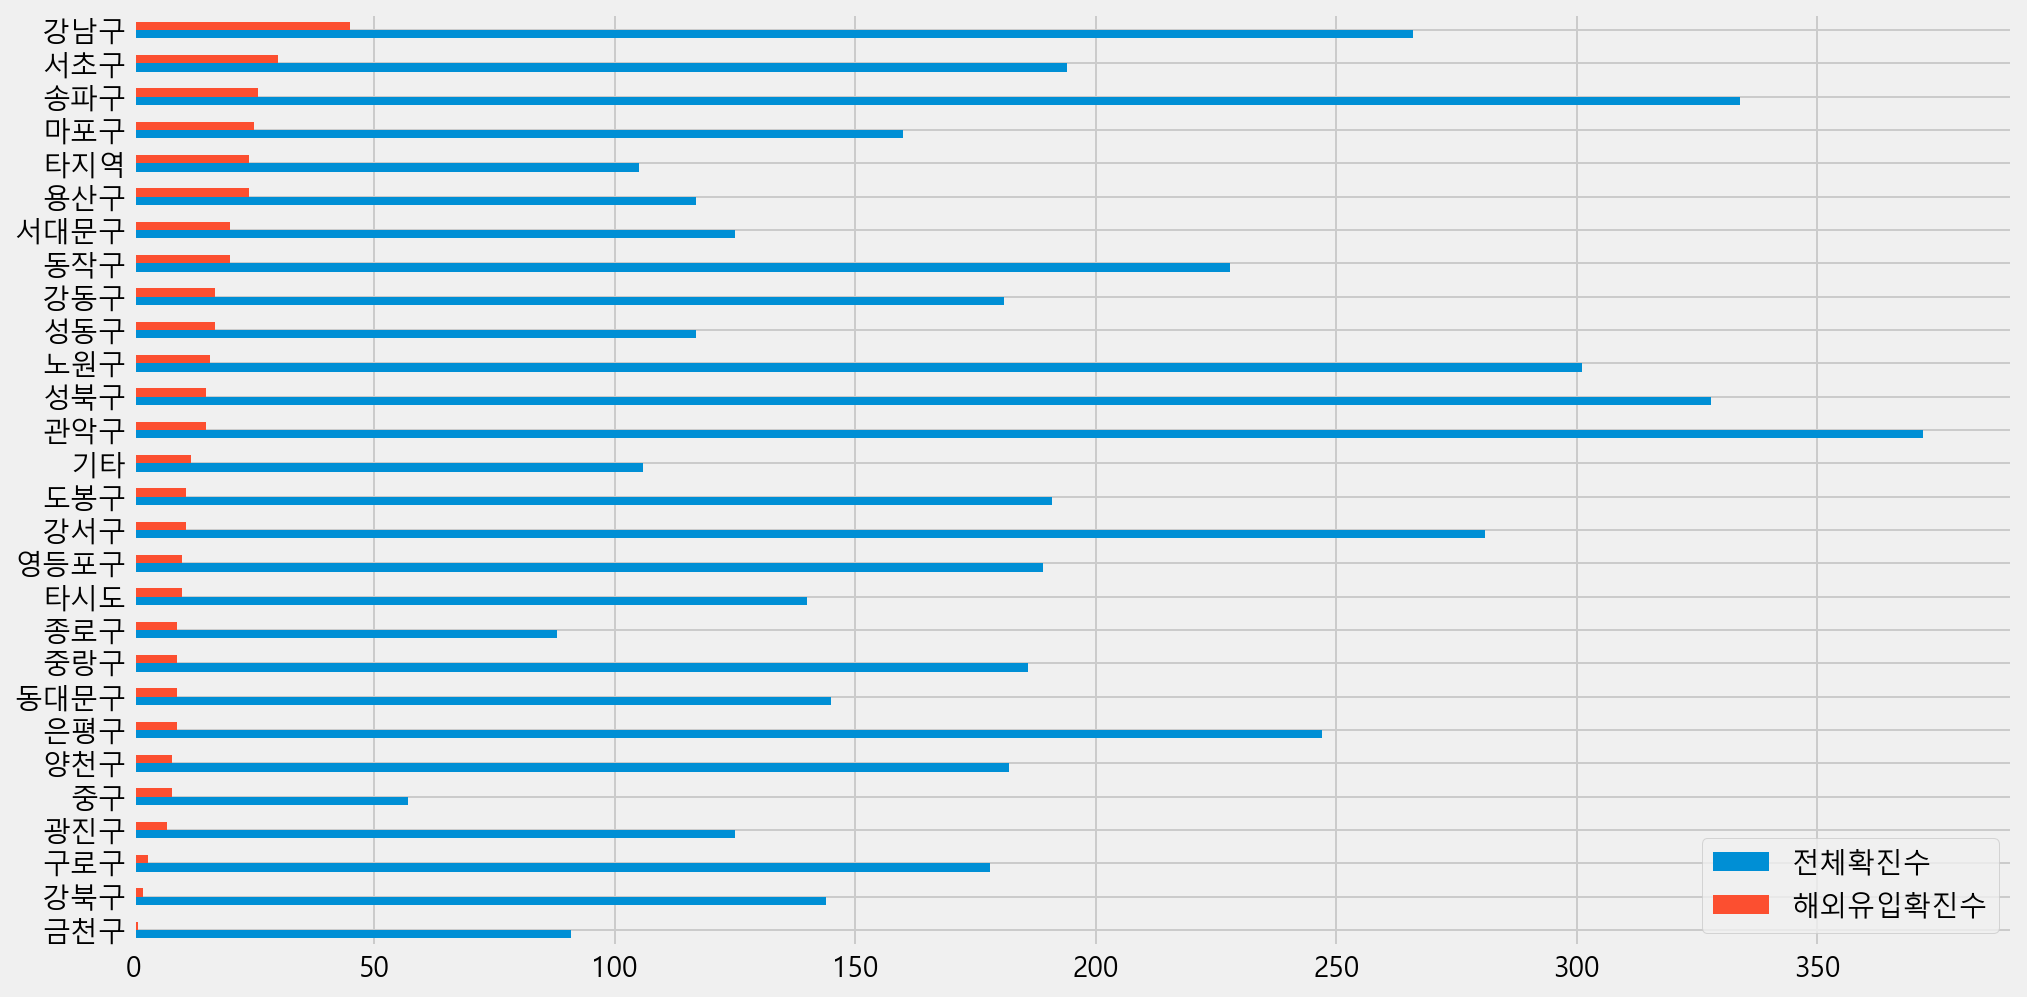

In [131]:
# 시각화 하기

df_all_oversea_case.sort_values(by="해외유입확진수").plot.barh(figsize=(15, 8))

In [132]:
# df_all_oversea_case["해외유입비율"] 구하기

df_all_oversea_case["해외유입비율"] = (df_all_oversea_case["해외유입확진수"] / df_all_oversea_case["전체확진수"]) * 100
df_all_oversea_case.sort_values(by="해외유입비율", ascending=False).head(10)

,전체확진수,해외유입확진수,해외유입비율
타지역,105,24,22.857143
용산구,117,24,20.512821
강남구,266,45,16.917293
서대문구,125,20,16.000000
마포구,160,25,15.625000
서초구,194,30,15.463918
성동구,117,17,14.529915
중구,57,8,14.035088
기타,106,12,11.320755
종로구,88,9,10.227273


### 해외유입 확진자 중 퇴원 여부

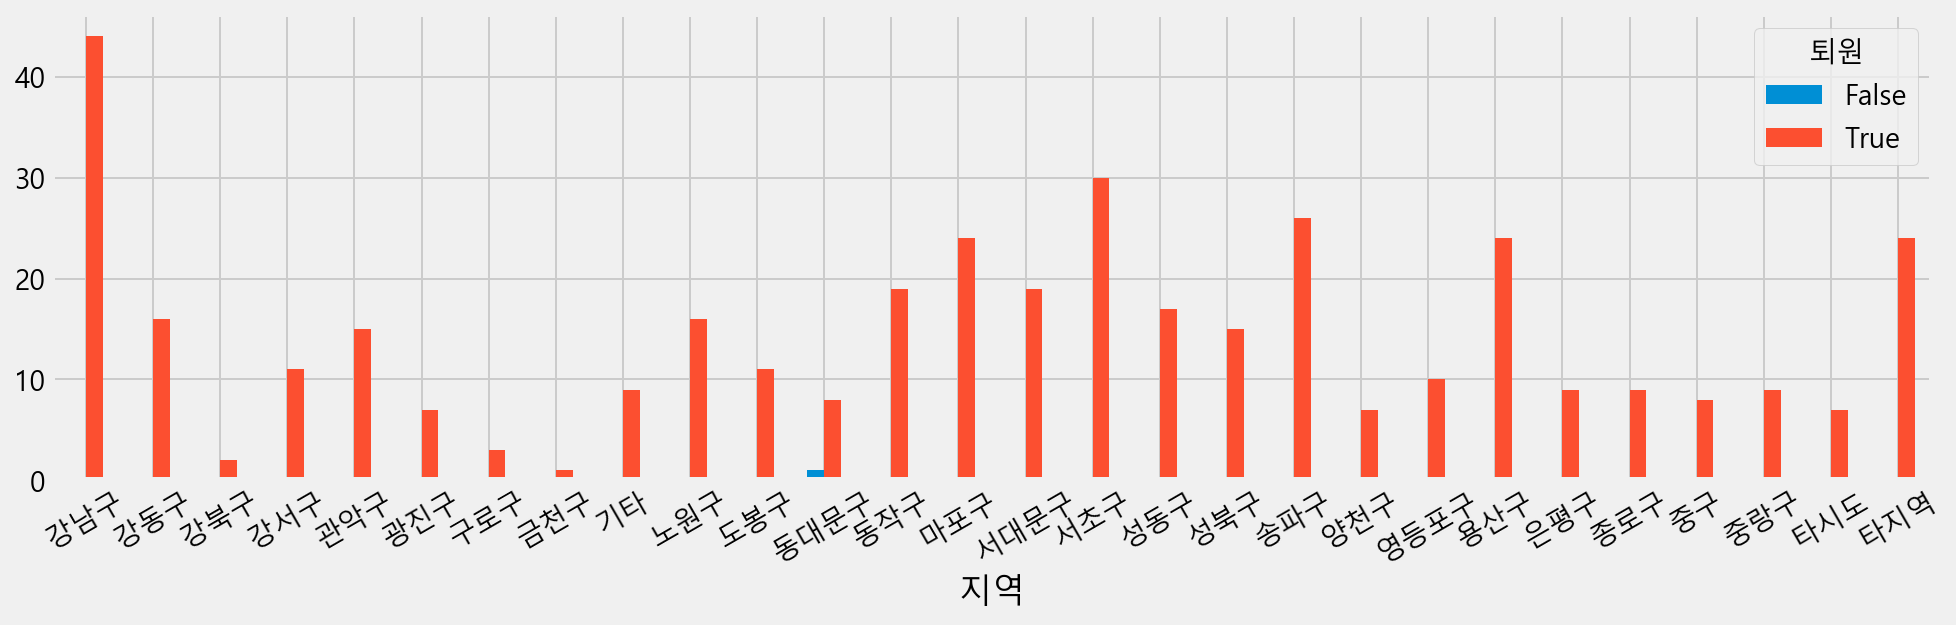

In [133]:
# oversea_finish_count 해외유입 확진자 중 퇴원 여부 구하기
oversea_finish_count = df_oversea.groupby(["지역", "퇴원"])["연번"].count().unstack()
oversea_finish_count = oversea_finish_count.fillna(0).astype(int)
oversea_finish_count.plot.bar(figsize=(15, 4), rot=30)

### 월별 해외 확진자 수

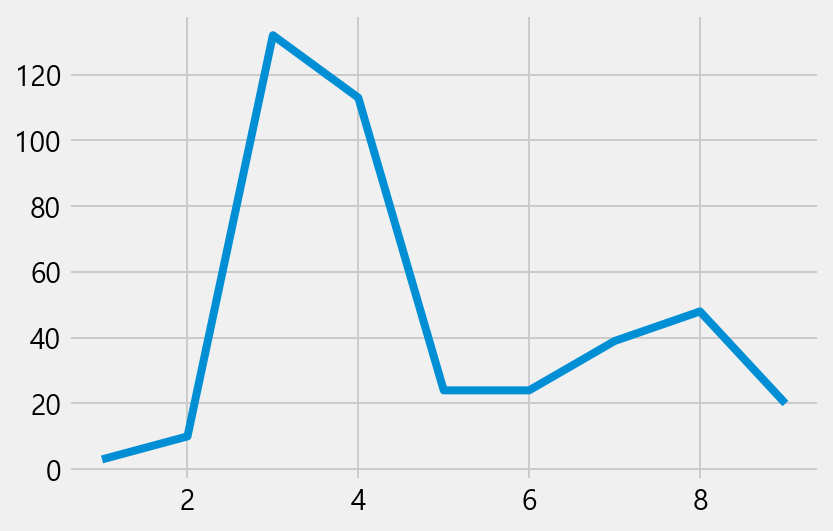

In [134]:
oversea_monthly_case = df_oversea["월"].value_counts()
oversea_monthly_case.sort_index().plot()

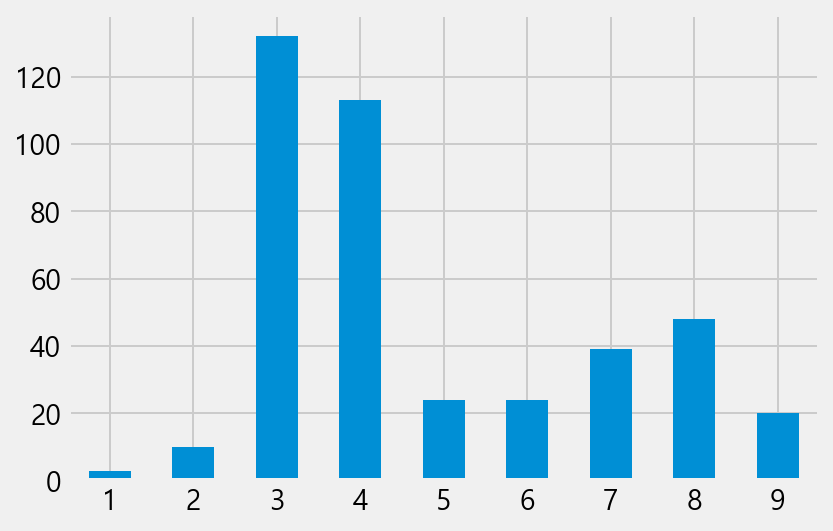

In [135]:
oversea_monthly_case.sort_index().plot.bar(rot=0)

### 구와 월별 해외 확진자 수
* groupby, crosstab, pivot_table 로 같은 결과의 테이블이 나오도록 구합니다.
#### groupby 로 빈도수 구하기

In [136]:
month_gu = df_oversea.groupby(["월", "지역"])["연번"].count().unstack()
month_gu = month_gu.fillna(0).astype(int)
month_gu.style.background_gradient(cmap="Greens")

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도,타지역
월,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,2,0,1,0,0,0,0,0,0,2
3,22,5,1,3,5,4,3,0,0,3,3,2,8,6,2,14,2,4,12,1,4,7,3,3,2,5,0,8
4,16,3,0,3,5,2,0,0,0,2,3,4,4,7,5,11,10,5,8,1,3,5,3,1,0,1,0,11
5,2,2,1,1,0,0,0,0,0,3,2,0,0,1,3,1,1,0,1,0,0,5,0,1,0,0,0,0
6,0,2,0,0,2,0,0,0,1,2,0,1,0,0,2,2,1,1,1,3,1,0,2,1,1,1,0,0
7,0,4,0,1,1,0,0,0,2,2,1,0,1,7,6,1,2,2,0,0,0,2,0,2,2,1,0,2
8,0,0,0,1,2,0,0,0,5,3,2,2,4,2,0,1,0,3,2,1,0,5,1,1,3,0,9,1
9,4,1,0,0,0,0,0,0,4,1,0,0,3,1,1,0,1,0,0,2,1,0,0,0,0,0,1,0


#### crosstab 으로 빈도수 구하기

In [137]:
#style.bar는 값이 적으면 색을 칠하지 않는 옵션
month_gu = pd.crosstab(df_oversea["월"], df_oversea["지역"])
month_gu.style.bar()

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도,타지역
월,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,2,0,1,0,0,0,0,0,0,2
3,22,5,1,3,5,4,3,0,0,3,3,2,8,6,2,14,2,4,12,1,4,7,3,3,2,5,0,8
4,16,3,0,3,5,2,0,0,0,2,3,4,4,7,5,11,10,5,8,1,3,5,3,1,0,1,0,11
5,2,2,1,1,0,0,0,0,0,3,2,0,0,1,3,1,1,0,1,0,0,5,0,1,0,0,0,0
6,0,2,0,0,2,0,0,0,1,2,0,1,0,0,2,2,1,1,1,3,1,0,2,1,1,1,0,0
7,0,4,0,1,1,0,0,0,2,2,1,0,1,7,6,1,2,2,0,0,0,2,0,2,2,1,0,2
8,0,0,0,1,2,0,0,0,5,3,2,2,4,2,0,1,0,3,2,1,0,5,1,1,3,0,9,1
9,4,1,0,0,0,0,0,0,4,1,0,0,3,1,1,0,1,0,0,2,1,0,0,0,0,0,1,0


#### pivot_table 로 빈도수 구하기

pivot은 연산을 할 수 없고 pivot_table은 연산을 할 수 있음 
즉 pivot_table이 더 큰 개념이다.

In [138]:
pd.options.display.max_columns = 30

In [139]:
month_gu = pd.pivot_table(df_oversea, index="월", columns="지역", values="연번", 
               aggfunc="count", fill_value=0)
month_gu

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도,타지역
월,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,2,0,1,0,0,0,0,0,0,2
3,22,5,1,3,5,4,3,0,0,3,3,2,8,6,2,14,2,4,12,1,4,7,3,3,2,5,0,8
4,16,3,0,3,5,2,0,0,0,2,3,4,4,7,5,11,10,5,8,1,3,5,3,1,0,1,0,11
5,2,2,1,1,0,0,0,0,0,3,2,0,0,1,3,1,1,0,1,0,0,5,0,1,0,0,0,0
6,0,2,0,0,2,0,0,0,1,2,0,1,0,0,2,2,1,1,1,3,1,0,2,1,1,1,0,0
7,0,4,0,1,1,0,0,0,2,2,1,0,1,7,6,1,2,2,0,0,0,2,0,2,2,1,0,2
8,0,0,0,1,2,0,0,0,5,3,2,2,4,2,0,1,0,3,2,1,0,5,1,1,3,0,9,1
9,4,1,0,0,0,0,0,0,4,1,0,0,3,1,1,0,1,0,0,2,1,0,0,0,0,0,1,0


### 해외유입이 많은 지역(구)

In [140]:
# 해외유입이 많은 상위 10개 지역을 구합니다.
top_oversea_gu = df_oversea["지역"].value_counts().head().index

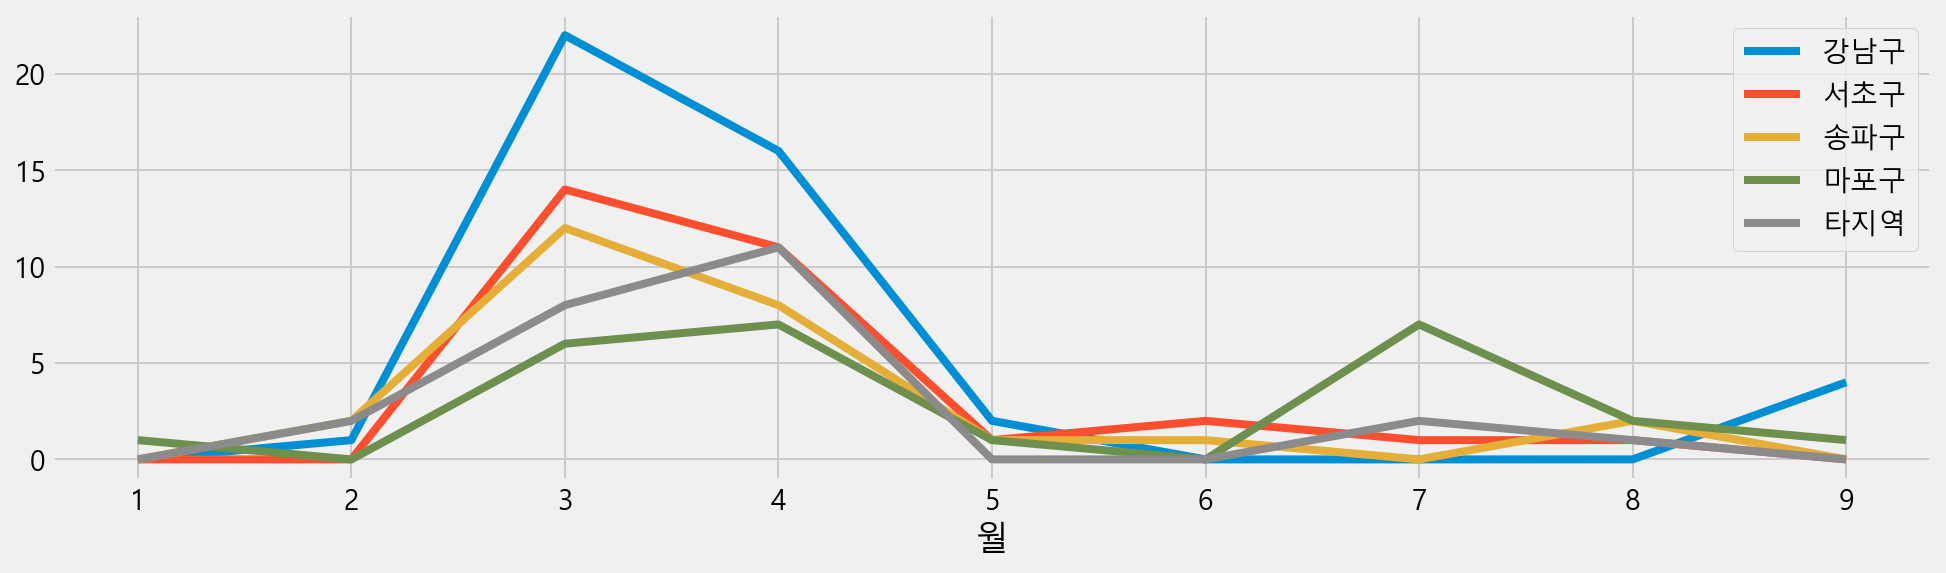

In [141]:
# 시각화 하기
#loc가 0이면 가운데에 배치 1이면 오른쪽에 배치한다
g = month_gu[top_oversea_gu].plot(figsize=(15, 4))
g.legend(loc=1)

* 범례 위치 조정하기 : [matplotlib.pyplot.legend — Matplotlib 3.1.2 documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html)

### 구별 해외유입 국가 분석하기
#### groupby 로 구하기

In [142]:
group_oversea_gu = df_oversea.groupby(["해외", "지역"])["연번"].count().unstack()
group_oversea_gu.fillna(0).astype(int)

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도,타지역
해외,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21263,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
UAE,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0
나이지리아,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
남미,3,0,0,0,0,0,0,0,1,1,0,1,0,5,2,1,1,0,1,0,0,0,2,0,1,0,0,3
네팔,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
러시아,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0
말레이시아,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
미국,24,5,1,4,4,2,1,0,2,3,3,3,3,5,4,18,9,9,11,3,2,8,1,3,0,4,1,10
방글라데시,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### pivot table 로 구하기
* groupby 로 구한 결과와 같은 결과가 나오게 구합니다.

In [144]:
group_oversea_gu = df_oversea.pivot_table(index="해외", columns="지역", values="연번", 
                       aggfunc="count",fill_value=0)
group_oversea_gu.style.background_gradient()

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도,타지역
해외,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21263,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
UAE,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0
나이지리아,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
남미,3,0,0,0,0,0,0,0,1,1,0,1,0,5,2,1,1,0,1,0,0,0,2,0,1,0,0,3
네팔,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
러시아,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0
말레이시아,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
미국,24,5,1,4,4,2,1,0,2,3,3,3,3,5,4,18,9,9,11,3,2,8,1,3,0,4,1,10
방글라데시,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### 일부 구만 따로 보기
* 전체는 너무 많기 때문에 특정 구만 따로 봅니다.

In [145]:
# 강남 3구의 입국자는 해외 어느 지역에서 입국했나?

group_oversea_gu.loc[["미국", "유럽", "남미", "중국"], ["강남구", "서초구", "송파구"]]

지역,강남구,서초구,송파구
해외,,,
미국,24,18,11
유럽,13,10,8
남미,3,1,1
중국,0,0,0


In [146]:
# top_oversea_gu 에 따른 확진수 보기
#how=all이면 5개의 구에서 모두 0일 경우만 drop시킨다.
group_oversea_gu[top_oversea_gu].dropna(how="all").fillna(0).astype(int)

지역,강남구,서초구,송파구,마포구,타지역
해외,,,,,
21263,0,0,0,0,0
UAE,0,0,1,0,0
나이지리아,0,0,0,0,0
남미,3,1,1,5,3
네팔,0,0,0,0,0
러시아,1,0,0,1,0
말레이시아,0,0,0,0,0
미국,24,18,11,5,10
방글라데시,1,0,0,0,0
